# Weiterentwicklung: neue Simulation

In diesem Notebook werden Sie die Ausbreitung einer ansteckenden Krankheit simulieren.  Die Simulation baut auf dem bisherigen Code des Game of Life auf und verwendet ein sehr ähnliches Modell.

Auf dieser Basis können Sie später noch zusätzliche Parameter einführen, beispielsweise eine Ansteckungswahrscheinlichkeit. Diese kann kleiner werden, wenn eine Impfung vorhanden ist oder Massnahmen ergriffen werden, beispielsweise wenn ein gewisser Prozentsatz der Population Masken trägt oder wenn Kranke isoliert werden und niemanden mehr anstecken können. Wenn Massnahmen gelockert werden oder der Erreger ansteckender wird, kann die Ansteckungswahrscheinlichkeit auch ansteigen.

## 1. Bisherige Simulation: Game of Life

Für das Game of Life haben Sie die Welt in einem zweidimensionalen Raster abgebildet. Zu jedem Zeitpunkt $t$ hatte *jede Zelle* einen *Zustand* (1 für lebend oder 0 für tot). Aus ihrem eigenen Zustand und denjenigen ihrer *acht Nachbarzellen* wurde anhand festgelegter Regeln für jede Zelle der Zustand zum Zeitpunkt $t+1$ ermittelt.

### 1.1. Modell: Zellulärer Automat
 
Ein solches System nennt man einen **zellulären Automaten**. Zelluläre Automaten eignen sich als *Modelle* für Simulationen von Systemen, die aus einer fixen Anzahl von Elementen (Zellen) bestehen, sich räumlich in einem n-dimensionalen Raum (*Zellularraum*; Welt) darstellen lassen und zyklisch verändern, wobei die Zustandsänderungen für alle Zellen gleichzeitig erfolgen und die Zeitabstände genau definiert sind (*Ticklänge*).

Dabei werden zwei Arten von **Nachbarschaften** unterschieden, die *Moore-Nachbarschaft* mit 8 Nachbarn, wie Sie sie im Game of Life gesehen haben und die *Von-Neumann-Nachbarschaft*, die aus den vier direkt angrenzenden Zellen besteht:

<img src="images/nachbarschaften.png" alt="direkte nachbarn" width="33%"/>

Der Status der Welt zu einem Zeitpunkt $t$ wird **Generation** genannt. Die Berechnung der Generationen erfolgt zyklisch in den Abständen **Ticklänge**.

#### 1.1.1. Game of Life als zellulärer Automat

* Zellularraum: Welt, 2-dimensional
* Zustandsmenge: {0 (tot), 1 (lebend)}
* Nachbarschaft: Moore-Nachbarschaft (Jede Zelle hat 8 Nachbarzellen)
* Überführungsfunktion (Regeln):
  * Lebende Zellen mit 
      * $<$ 2 lebenden Nachbarn: sterben (Unterpopulation)
      * $>$ 3 lebenden Nachbarn: sterben (Überpopulation)
      * 2 oder 3 lebenden Nachbarn: überleben
  * Tote Zellen mit 
      * genau 3 lebenden Nachbarn: werden geboren

### 1.2. Umsetzung (Code)

Die Umsetzung des Game of Life erfolgte über die beiden Funktionen `iterate(world)` und `display_world(world, number_of_iterations, tick_length=0.4)`. Beide Funktionen nehmen die Welt entgegen, einen zweidimensionalen Array (auch Matrix genannt), der eine Generation (die Welt im Zustand zum Zeitpunkt $t$) darstellt.

* `iterate(world)`  
  ermittelt die Folgegeneration (den neuen Zustand der Welt zum Zeitpunkt $t+1$) ausgehend von der durch `world` repräsentierten Generation (Zustand der Welt zum Zeitpunkt $t$). Die Berechnung erfolgt für jede Zelle unter Berücksichtigung des Zustands der Zelle und den Zuständen ihrer acht Nachbarzellen unter Anwendung der Regeln.
* `display_world(world, number_of_iterations, tick_length=0.4)`  
  ist für die Visualisierung zuständig. Ausgehende von der Ausgangsgeneration (`world`) berechnet sie `number_of_iterations` neue Generationen und zeigt diese im Abstand von `tick_length` an.

#### 1.2.1. Gesamter Code und dessen Verwendung als Script

In der folgenden Zelle ist der gesamte Code des Game of Life mit einer zufälligen Startgeneration zusammengetragen. Sie finden ihn auch im Script `main_game_of_life.py`.

Dieses Script können Sie auch ausserhalb von Jupyter Notebooks laufen lassen. Wenn Sie das Jupyter-Notebook verlassen, müssen sie allerdings *ein paar kleine Änderungen vornehmen*, da die Anzeige in Jupyter eine Jupyter-spezifische Bibliothek verwendet. Diese sind mit dem Kommentar `# <---` gekennzeichnet. In Klammer dahinter steht jeweils, was zur Verwendung ausserhalb von Jupyter angepasst (gelöscht, einkommentiert oder ausgetauscht) werden muss.

Das angepasste Script (Sie finden es auch auf Teams unter dem Namen `simuliere_game_of_life.py`) können Sie in einer Entwicklungsumgebung wie beispielsweise *PyCharm Edu* verwenden das Pythonscript im *Terminal* mit dem Befehl `$ Python main_game_of_life.py` ausführen – vorausgesetzt Sie haben Python 3 und die Bibliotheken `NumPy` und `matplotlib` installiert.

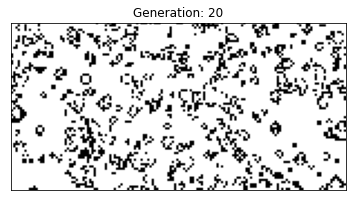

In [24]:
import numpy as np # NumPy: Bibliothek für numerische Berechnungen
import matplotlib.pyplot as plt # PyPlot: Bibliothek für Visualisierungen (Plots)
from IPython import display # <--- Jupyter-Notebook-spezifische Bibliothek (ausserhalb von Jupyter: löschen)
import time # <--- ebenfalls Jupyter-Notebook-spezifisch, kann aber mit PyPlot gelöst werden (ausserhalb von Jupyter: löschen)

################################################################################
# Berechnung der nächsten Generation (Welt zum Zeitpunkt t+1),                 #
# ausgehend von der übergebenen Generation (Welt zum Zeitpunkt t)              #
# Argument:                                                                    #
# - world: welt; ein zweidimensionaler Array (eine Matrix);                    #
#          stellt eine Generation (die Welt zu einem Zeitpunkt) dar.           #
################################################################################
def iterate(world):
        
    # Kopie des Ausgangszustands machen
    old_world = np.copy(world)
    
    # Höhe und Breite der Welt bestimmen
    height = world.shape[0]
    width = world.shape[1]
    
    # Über alle Zellen iterieren (Mit einer Schleife alle Zellen durchgehen)
    for (i,j) in np.ndindex((height, width)):
        
        ########################################################################
        # Berechnung der Anzahl der lebenden Nachbarn (neighbours_alive)       #
        ########################################################################
        
        # Für den Moment definieren Sie, dass Zellen am Rand nie lebende Nachbarn haben.
        if i==0 or j==0 or i==height-1 or j==width-1: 
            neighbours_alive = 0
            
        else: 
            # Für alle anderen Zellen berechnen Sie die Anzahl lebender Nachbarn.
            # Wie kommen Sie zu dieser Summe?
            # Da lebende Zellen den Zustand 1 haben, können Sie die Anzahl lebender
            # Nachbarn einer Zelle (i,j) finden, indem Sie den Teilbereich 
            # von i-1 bis und ohne i+2 und von j-1 bis und ohne j+2 auslesen, 
            # alle Werte aufsummieren und den Wert der Zelle (i,j) von der 
            # ermittelten Summe abziehen, da Sie den Wert der Zelle (i,j) mitgezählt 
            # haben, aber nur die lebenden Nachbarn zählen wollen.
            neighbours_alive = np.sum(old_world[i-1:i+2, j-1:j+2]) - old_world[i,j]
            
            
        #### Alternativ: Zellen an den Rändern sind jeweils benachbart
        #### (Oberfläche eines "Donuts"):
        # neighbours_alive = old_world[(i-1+height)%height, (j-1+width)%width]
        # neighbours_alive += old_world[(i-1+height)%height, j]
        # neighbours_alive += old_world[(i-1+height)%height, (j+1)%width]
        # neighbours_alive += old_world[i, (j-1+width)%width]
        # neighbours_alive += old_world[i, (j+1)%width]
        # neighbours_alive += old_world[(i+1)%height, (j-1+width)%width]
        # neighbours_alive += old_world[(i+1)%height, j]
        # neighbours_alive += old_world[(i+1)%height, (j+1)%width]
            
        ########################################################################
        # Berechnung des neuen Zustands der Zelle (state)                      #
        ########################################################################

        state = old_world[i,j]
        
        # Anwendung der Regeln
        if(state == 1 and (neighbours_alive < 2 or neighbours_alive > 3)):
            new_state = 0
        elif(state == 0 and neighbours_alive == 3):    
            new_state = 1
        else:
            new_state = state
    
        world[i,j] = new_state

################################################################################
# Visualisierung                                                               #
# Argumente:                                                                   #
# - welt: zweidimensionaler Array (eine Matrix), der eine Generation (die Welt #
#         zu einem Zeitpunkt) darstellt                                        #
# - number_of_iterations: Anzahl Generationen, die berechnet werden sollen     #
# - tick_length: Zeitabstände in denen die Generationen neu berechnet und      #
#                er zeugt werden. OPTIONAL: wenn tick_length beim Funktions-   #
#                aufruf nichts angegeben wird, wird der Standardwert (Default- #
#                wert) von 0.4 Sekunden verwendet.                             #
################################################################################
def display_world(world, number_of_iterations, tick_length=0.4):
    """Display the evolution of world for 
    the next number_of_iterations"""
    
    # Vorbereitung des Plots (ausserhalb Jupyter Notebook): 
    # Interactive-Modus einschalten mit plt.ion()
    # Ausserhalb des Interactive-Modus wird jede Generation in einem neuen 
    # Fenster dargestellt, wenn das alte Fenster geschlossen wird.
    # plt.ion() # <--- (ausserhalb von Jupyter: einkommentieren)
    
    # Die folgende Zeile werden Sie in der neuen Simulation wieder antreffen...
    # figure = plt.figure() # <--- (ausserhalb von Jupyter: einkommentieren)

    for i in range(number_of_iterations):
        
        # Den Output der aktuellen Zelle (des Jupyter Notebooks) löschen
        # parameter wait: Soll gewartet werden, bis der neue Output bereitsteht?
        display.clear_output(wait=True) # <--- (ausserhalb von Jupyter: löschen)
        
        # Beschriftung der x- und y-Achsen des Plots deaktivieren
        plt.xticks([]), plt.yticks([])
        
        # Anzeige der aktuellen Generation als Titel
        # Tipp: Wenn Sie i+1 anzeigen, ist die Anzeige lesbarer, da Sie mit der Generation 1 anfangen
        plt.title("Generation: " + str(i+1))
        
        # Welt anzeigen
        plt.imshow(world, cmap=plt.cm.gray_r)
        
        # Plot anzeigen 
        plt.show()
        
        # Die nächste Generation berechnen (Aufruf der oben definierten Funktion)
        iterate(world)
        
        # Anzeige des Plots (ausserhalb von Jupyter; wäre hier aber auch "erlaubt")
        # figure.canvas.draw() # <--- (ausserhalb von Jupyter: einkommentieren)
        
        # Warten (tick_length Sekunden)
        time.sleep(tick_length) # <--- (ausserhalb von Jupyter ersetzen durch: 
                                #       plt.pause(tick_length) )
                
# Anwendung am Beispiel einer zufälligen Welt:
random_world = np.random.randint(0,2,(75,150))
display_world(random_world, number_of_iterations=20, tick_length=0.3)

## 2. Neue Simulation: Verbreitung einer Krankheit

Nachdem Sie den Code des Game of Life verstanden haben, sind Sie dazu gerüstet, selbst eine Simulation zu erstellen.

In diesem Notebook werden Sie alles finden, um die Verbreitung eines Krankheitserregers (sehr stark vereinfacht) zu simulieren.

### 2.1. Parameter

* Populationsgrösse: Höhe und Breite (um möglichst viel Code wiederverwerten zu können)
* Initiale Anzahl Infizierter
* Dauer: Anzahl Tage, über welche die Simulation laufen soll.

### 2.2. Modell

Wie das Game of Life lässt sich auch die Verbreitung eines Krankheitserregers mit einem *zellulären Automaten* modellieren.

#### 2.2.1. Zellularraum (Welt)

Wie beim Game of Life liegt der Simulation eine zweidimensionale Welt aus Zellen zugrunde. 

Hier könnte es interessanter sein, die Ränder nicht als Nachbarn zu betrachten. Als kleiner Nebeneffekt lässt sich dadurch (stark vereinfacht) eine geographische Ausbreitung des Erregers beobachten - beispielsweise von Genf (links unten) bis St.Gallen (rechts oben).

#### 2.2.2. Zustandsmenge

Jede Zelle kann die **Zustände 0 bis 8** annehmen:

* Zustand 0: gesund (kann angesteckt werden)
* Zustände 1-7: krank (ist ansteckend)
* Zustand 8: genesen (kann nicht mehr angesteckt werden und ist nicht mehr ansteckend)

#### 2.2.3. Nachbarschaft

Ob eine Zelle angesteckt wird, soll nur von ihren direkten Nachbarn abhängen. Betrachten Sie für diese Simulation deshalb lediglich die direkten Nachbarn (Von-Neumann-Nachbarschaft):
<img src="images/nachbarn_direkt.png" alt="direkte nachbarn" width="12.5%"/>

#### 2.2.4. Überführungsfunktion (Ansteckungsregeln)

Es soll einzig die folgende Regel gelten, nach welcher der neue Zustand der Welt berechnet wird:

Eine gesunde Zelle (Status 0) wird *mit einer Wahrscheinlichkeit von 25%* angesteckt, falls mindestens eine (direkte) Nachbarzelle krank (Status 1 bis 7) ist. Die Dauer, während der eine Zelle *ansteckend* (krank) ist, beträgt *eine Woche* (7 Tage). In dieser Zeit wird der Zustand der Zelle jeweils um 1 erhöht.

*Um das Modell zu verbessern, können die Regeln angepasst werden.*

### 2.3. Umsetzung des Modells

#### 2.3.1. Zufallszahlen

Um die Ansteckungswahrscheinlichkeit zu implementieren, benötigen Sie Zufallszahlen. "Zufallszahlen" vom Typ Integer können Sie mit der Funktion `randint` des Moduls `np.random` verwenden. Falls Sie kein NumPy (np) installiert haben, können Sie auch nur das Modul `random` importieren, das die Funktion `randint` ebenfalls anbietet. (Allerdings ist der obere Rand des Bereichs, in dem die Zufallszahlen sein sollen, bei random im Gegensatz zu np.random *inklusiv*.) Vielleicht ist Ihnen aufgefallen, dass der Begriff *Zufallszahlen* mit Gänsefüsschen versehen ist. Es handelt sich bei den generierten Zahlen nämlich um Pseudo-Zufallszahlen, da dem Generator ein Algorithmus zugrunde liegt, der – wenn gleich initialisiert – immer dieselben Zahlen generiert, die deshalb nicht mehr ganz so zufällig sind und bei sicherheitsrelevanten Anwendungen nicht angebracht sind. Hier können Sie aber bedenkenlos Pseudozufallszahlen verwenden.

Die Funktion `random.randint(low, high=None, size=None, dtype=int)` aus NumPy bietet die Möglichkeit, Integer-Werte in einem definierten Bereich zu erstellen. Dieser Bereich wird abgegrenzt von `low`, dem unteren Rand (inklusiv) und `high`, dem oberen Rand (exklusiv). Dabei ist *jede Zufallszahl in diesem Bereich gleich wahrscheinlich*.

Dies können Sie nutzen, um Zufallswerte mit einer gegebenen Wahrscheinlichkeit zu generieren, denn bei Werten aus einem Bereich aus zwei Werten wie {0,1} tritt jeder dieser Werte mit einer Wahrscheinlichkeit von 50% auf. Bei einem Bereich mit drei Werten, tritt jeder Wert mit einer Wahrscheinlichkeit von 1/3 (also etwa 33%) auf etc. Bei einem Bereich, der zehn Werte zulässt, hat jeder Wert eine Wahrscheinlichkeit von 1/10 also 10%.

##### 2.3.1.1. Aufgabe 1 – Zufallszahlen mit einer Wahrscheinlichkeit von 25%

Um eine Zufallszahl mit der Wahrscheinlichkeit von 25% zu erhalten, generieren Sie also zufällige Werte im Bereich von 0 bis 3.

```Python
np.random.randint(0,4)
```

Von den möglichen Werten hat nun jeder eine Wahrscheinlichkeit von 1/4 oder 25%.

Schreiben Sie dann eine Funktion `zufallszahl_25p`, die eine Zufallszahl im Bereich von 0 bis 3 zurückgibt.

<details>
    <summary>
        Hinweis
    </summary>

Sie benötigen die Funktion `random.randint` aus der Bibliothek NumPy. Falls dies noch nicht geschehen ist, müssen Sie NumPy importieren:

```Python
import numpy as np
```
</details>

<details>
    <summary>
        Lösung
    </summary>

```Python
import numpy as np

def zufallszahl_25p():
    return np.random.randint(0,4)
```
</details>

In [2]:
# Ihr Code

In [3]:
# Ihr Code
import numpy as np

def zufallszahl_25p():
    return np.random.randint(0, 4)

#### 2.3.2. Erstellen einer neuen Welt

Sie wollen nun eine Welt erstellen. Ihre Welt soll die Höhe `hoehe` und die Breite `breite` haben.

##### 2.3.2.1. Aufgabe 2 – Welt von Gesunden

Wie beim Game of Life können Sie Ihre Welt mit Nullen initialisieren. In dieser Welt sind alle Zellen gesund.

In einem ersten Schritt erstellen Sie eine Matrix (einen zweidimensionalen Array) mit der Dimension Höhe mal Breite, die lauter Nullen vom Typ Integer enthält. 

Sie können Ihre Dimensionen frei wählen, in der Lösung wird eine Matrix der Dimension 10x15 erstellt und anschliessend ausgegeben.

<details>
    <summary>
        Hinweis
    </summary>

- Sie benötigen die Funktion `zeros` aus der Bibliothek NumPy. 
    
```Python
np.zeros((hoehe, breite), int)
```
- Zur Kontrolle können Sie die erstellte Matrix auch mit der `print`-Funktion ausgeben.
    
</details>

<details>
    <summary>
        Lösung
    </summary>
    
```Python
hoehe = 10
breite = 15

welt = np.zeros((hoehe, breite), int)

print(welt)
```
</details>

In [4]:
# Ihr Code

In [5]:
# Lösung

hoehe = 10
breite = 15

welt = np.zeros((hoehe, breite), int)

print(welt)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


##### 2.3.2.2. Aufgabe 3 – Zellen infizieren

Am Anfang der Simulation soll eine gegebene Anzahl Zellen infiziert (ansteckend) sein.

Führen Sie eine Variable `anzahl_infizierte` ein und infizieren Sie in Ihrer Welt die entsprechende Anzahl Zellen, die Sie zufällig auswählen.

<details>
    <summary>
        Hinweise
    </summary>

- Wählen Sie zufällige Zellen aus und geben Sie ihnen einen Wert im Bereich von 1 bis und mit 7. Gehen Sie davon aus, dass am Anfang noch keine Zelle genesen ist (Wert 8).
    
- <strong>Zufällige Zellen auswählen</strong>  
Da es möglich ist, dass Zellen mehrmals ausgewählt werden, wenn Sie zufällig Koordinaten generieren, müssen Sie jeweils prüfen, ob die zufällig ausgewählte Zelle noch den Wert 0 hat (also noch nicht ausgewählt wurde).  

- Da Sie bereits wissen, wie viele Zellen Sie infizieren wollen, können Sie diese Variable als Zähler benutzen und jeweils verkleinern, wenn Sie eine Zelle infiziert haben.
    
- Zur Kontrolle können Sie die erstellte Matrix wiederum mit der `print`-Funktion ausgeben.
    
</details>

<details>
    <summary>
        Lösung
    </summary>
    
```Python
anzahl_infizierte = 5
    
while anzahl_infizierte > 0:
    rand_i = np.random.randint(0, hoehe)
    rand_j = np.random.randint(0, breite) 
    if welt[rand_i, rand_j] == 0:
        welt[rand_i, rand_j] = np.random.randint(1,8)
        anzahl_infizierte -= 1 # anzahl_infizierte um 1 verkleinern
    
print(welt)
```
</details>

In [6]:
# Ihr Code

In [6]:
# Lösung

anzahl_infizierte = 5

while anzahl_infizierte > 0:
    rand_i = np.random.randint(0, hoehe)
    rand_j = np.random.randint(0, breite) 
    if welt[rand_i, rand_j] == 0:
        welt[rand_i, rand_j] = np.random.randint(1,8)
        anzahl_infizierte -= 1 # anzahl_infizierte um 1 verkleinern

print(welt)

[[0 0 0 0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [6 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]]


##### 2.3.2.3. Aufgabe 4 – Funktion zur Erstellung und Initialisierung der Welt

Damit Sie nicht immer mehrere Zeilen Code schreiben müssen, um eine Welt zu erstellen und zu initialisieren und damit Ihr Code etwas lesbarer wird, können Sie die Erstellung und Initialisierung nun in einer Funktion zusammenfassen.

Erstellen Sie eine Funktion `neue_welt`, welche die Welt erstellt, initialisiert und zurückgibt.

<details>
    <summary>
        Hinweis: Welche Parameter nimmt die Funktion entgegen?
    </summary>
    
- Dimension in Form von Höhe und Breite    
- Anzahl initial infizierter (ansteckender) Zellen
</details>

<details>
    <summary>
        Lösung
    </summary>
    
```Python
def neue_welt(hoehe, breite, anzahl_infizierte):
    welt = np.zeros((hoehe, breite), int)

    while anzahl_infizierte > 0:
        rand_x = np.random.randint(0, breite)
        rand_y = np.random.randint(0, hoehe) 
        if welt[rand_y, rand_x] == 0:
            welt[rand_y, rand_x] = np.random.randint(1,8)
            anzahl_infizierte -= 1 # anzahl_infizierte um 1 verkleinern
        
    return welt
```
</details>

In [7]:
def neue_welt(hoehe, breite): # ergänzen Sie die fehlenden Parameter
    welt = np.zeros((hoehe, breite), int)

    # Ihr Code

    return welt

# Rufen Sie die Funktion auf mit den Werten Höhe: 10, Breite: 15, Infizierte: 5
# und speichern Sie die neue Welt in der Variable welt:


#print(welt)



In [8]:
# Lösung

def neue_welt(hoehe, breite, anzahl_infizierte):
    welt = np.zeros((hoehe, breite), int)
    
    while anzahl_infizierte > 0:
        rand_i = np.random.randint(0, hoehe)
        rand_j = np.random.randint(0, breite) 
        if welt[rand_i, rand_j] == 0:
            welt[rand_i, rand_j] = np.random.randint(1,8)
            anzahl_infizierte -= 1 # anzahl_infizierte um 1 verkleinern
        
    return welt

# Rufen Sie die Funktion auf mit den Werten Höhe: 10, Breite: 15, Infizierte: 5
# und speichern Sie die neue Welt in der Variable welt:
welt = neue_welt(hoehe=10, breite=15, anzahl_infizierte=20)

print(welt)

[[0 0 0 0 0 0 0 0 0 7 0 0 6 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 4 5 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 4 0 0 2 0 0 0 0 0 4]
 [0 7 0 0 0 0 0 0 0 0 0 2 1 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 7 0 0 6 0 0 2 0 0 0 0]]


#### 2.3.3. Informationen aus der Welt lesen

Möglicherweise möchten Sie irgendwann wissen, wie viele Nachbarn einer Zelle infiziert sind. Mit der ursprünglichen Regel reicht es, wenn die Summe der Zustände der Nachbarn > 0 ist, damit eine Zelle möglicherweise angesteckt wird. Falls die Wahrscheinlichkeit einer Ansteckung mit der Anzahl infizierter Nachbarn ansteigen sollte, müssten Sie genau wissen, wie viele Nachbarn angesteckt sind. Am einfachsten ginge dies, wenn Sie die Welt dann in Nullen und Einsen ausdrücken würden.

Dies ist auch hilfreich, wenn Sie sich einen Überblick verschaffen wollen, wie viele Zellen überhaupt in einem ansteckenden Zustand sind.

##### 2.3.3.1. Infizierte Zellen markieren

Dazu können Sie die Funktion [`where`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) von NumPy verwenden, die sich wie eine **if**-Abfrage verhält, die auf jedes Element Ihrer Matrix angewandt wird.

Beispiel einer 5x10-Demowelt mit 15 Infizierten: Aus einer Matrix mit den Werten 0 bis 8 entsteht eine Matrix mit den Werten 0 und 1:

`np.where(welt>0,1,0)` entspricht folgendem Pseudocode:
```
für jedes Element e der Matrix welt:
    wenn e>0:
        e=1
    sonst:
        e=0
```

In [9]:
demowelt = neue_welt(5, 10, 15)
print("demowelt:")
print(demowelt)

welt_infiziert = np.where(demowelt > 0, 1, 0)

print("welt_infiziert:")
print(welt_infiziert)

demowelt:
[[0 0 0 6 0 2 5 0 5 0]
 [5 2 0 0 0 0 7 0 0 0]
 [0 0 0 0 0 0 5 0 0 6]
 [0 0 0 0 0 7 0 0 1 6]
 [0 0 1 0 7 0 0 0 1 0]]
welt_infiziert:
[[0 0 0 1 0 1 1 0 1 0]
 [1 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 1 0 0 1 1]
 [0 0 1 0 1 0 0 0 1 0]]


##### 2.3.3.2. Ansteckende Zellen markieren

Nun wird es in Ihrer Simulation auch Zellen geben, die *bereits genesen* sind (Zustand 8). Diese sind *nicht mehr ansteckend*, haben aber ebenfalls einen Zustand grösser als 0.

Dieses Problem lässt sich am einfachsten lösen, indem Sie in Ihrer Welt zuerst alle Vorkommen von 8 in 0 umwandeln, bevor Sie die Zustände 1 bis 7 auf 1 setzen:

In [10]:
demowelt = neue_welt(5, 10, 15)

# Zellen an den Ecken auf den Zustand 8 setzen:
demowelt[0,0] = 8
demowelt[0,9] = 8
demowelt[4,0] = 8
demowelt[4,9] = 8
print("demowelt:")
print(demowelt)

# Alle Vorkommen des Werts 8 durch Nullen ersetzen:
demowelt_ansteckend = np.where(demowelt == 8, 0, demowelt)
print("demowelt_ansteckend, nur mit Zellen in ansteckenden Zuständen:")
print(demowelt_ansteckend)

# Nun enthält die demowelt nur Werte von 0 bis 7.
# Alle Werte > 0 durch 1 ersetzen:
demowelt_ansteckend = np.where(demowelt_ansteckend > 0, 1, 0)
print("demowelt_ansteckend:")
print(demowelt_ansteckend)

demowelt:
[[8 2 0 0 0 4 5 1 0 8]
 [0 0 0 0 0 0 0 7 2 0]
 [0 0 0 0 0 5 0 7 0 1]
 [1 5 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 2 6 0 0 8]]
demowelt_ansteckend, nur mit Zellen in ansteckenden Zuständen:
[[0 2 0 0 0 4 5 1 0 0]
 [0 0 0 0 0 0 0 7 2 0]
 [0 0 0 0 0 5 0 7 0 1]
 [1 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 6 0 0 0]]
demowelt_ansteckend:
[[0 1 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 1 0 1 0 1]
 [1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0]]


##### 2.3.3.3. Ansteckende Zellen zählen

Um zu wissen, wie viele Zellen in einem Bereich ansteckend sind, können Sie die Funktion [`sum`](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) von NumPy anwenden, die alle Werte in einem Array aufsummiert.

Mal sehen, ob eine mit `neue_welt(5, 10, 15)` generierte Testwelt tatsächlich 15 infizierte Zellen enthält:

In [11]:
testwelt = neue_welt(5, 10, 15)
# Alle Werte > 0 durch 1 ersetzen:
testwelt = np.where(testwelt > 0, 1, 0)

np.sum(testwelt)

15

#### 2.3.4. Regeln anpassen

Um Ihre Simulation umzusetzen, können Sie nun die Berechnung des neuen Zustands im bisherigen Programm anpassen.

Einerseits erfolgt die Ermittlung der angesteckten Nachbarn auf eine andere Weise, da Sie nun eine Von-Neumann-Nachbarschaft (nur 4 direkte Nachbarn) haben. Andererseits haben Sie neue Berechnungsregeln. 

Machen Sie sich nun Gedanken dazu, wie Sie den Code des Game of Life anpassen, damit Sie die Ausbreitung eines Krankheitserregers simulieren können.

*Passen Sie für die Aufgaben 5, 6, 7 und 9 den Code in der Zelle nach Aufgabe 9 an.*

##### 2.3.4.1. Aufgabe 5 – Ansteckende Zellen markieren

Bilden Sie in der Matrix `world_infectuous` die Welt vereinfacht ab wie unter Punkt 2.3.3.2. beschrieben, so dass ansteckende Zellen den Wert 1 haben und alle anderen den Wert 0.

<details>
    <summary>
        Hinweise
    </summary>

- Zellen im Zustand 8 sind genesen und werden durch den Wert 0 repräsentiert.
    
- Wenn Sie alle Vorkommen des Werts 8 in 0 umgewandelt haben, haben alle ansteckenden Zellen Werte > 0 und können durch den Wert 1 ersetzt werden.

- Damit Sie keine 1 durch eine 1 ersetzen müssen, können Sie Werte > 1 auf durch 1 ersetzen...

</details>

<details>
    <summary>
        Lösung
    </summary>
        
```Python
# Zellen mit dem Status 8 sind genesen und nicht mehr ansteckend
world_infectuous = np.where(world == 8, 0, world)
# Zellen mit dem Status > 0 sind ansteckend. 
world_infectuous = np.where(world_infectuous > 1, 1, 0)
```
</details>

##### 2.3.4.2. Aufgabe 6 – Anzahl ansteckender Nachbarzellen

Wie ermitteln Sie die Anzahl ansteckender Nachbarzellen einer Zelle?

<details>
    <summary>
        Hinweise
    </summary>
    
- Wie auch bereits beim Game of Life lassen sich die Zustände der Nachbarzellen aufsummieren.  
Beachten Sie dabei aber, dass Sie im Unterschied zum Game of Life nicht mehr 8, sondern nur noch die 4 direkt angrenzenden Nachbarzellen beachten.
    
- Sie können für die Summe der ansteckenden Nachbarn die Variable `neighbours_alive` in `neighbours_infectuous` umbenennen.
    
</details>

<details>
    <summary>
        Lösung
    </summary>
    
Summieren Sie die Werte (Zustände der Zellen) oben, rechts, unten und links von der Zelle auf und speichern Sie sie in einer Variablen `neighbours_infectuous`, etwa so (Da Sie an den Rändern auf nicht vorhandene Indizes zugreifen, wird dieser Code noch nicht funktionieren):
    
```Python
neighbours_infectuous = 0
neighbours_infectuous += world_infectuous[i-1, j]
neighbours_infectuous += world_infectuous[i+1, j]
neighbours_infectuous += world_infectuous[i, j-1]
neighbours_infectuous += world_infectuous[i, j+1]
```
</details>

##### 2.3.4.3. Aufgabe 7 – Zellen am Rand

Wie gehen Sie hier mit den Zellen am Rand vor?

<details>
    <summary>
        Hinweis
    </summary>
    
Sie haben zwei Möglichkeiten: Entweder haben Zellen am Rand weniger Nachbarn oder Sie gehen nicht von einer Ebene aus, sondern von einem Donut, wo der untere Rand an den oberen angrenzt und der linke an den rechten.  

Bei dieser Simulation ist es ratsam, davon auszugehen, dass die Welt Ränder hat. Wie bereits erwähnt, können Sie damit (vereinfacht) simulieren, wie sich ein Erreger geographisch ausbreitet.

</details>

<details>
    <summary>
        Lösung
    </summary>
    
```Python
neighbours_infectuous = 0
if i > 0:
    neighbours_infectuous += world_infectuous[i-1, j]
if i < heigh-1:
    neighbours_infectuous += world_infectuous[i+1, j]
if j > 0:
    neighbours_infectuous += world_infectuous[i, j-1]
if j < width-1:
    neighbours_infectuous += world_infectuous[i, j+1]
```
</details>

##### 2.3.4.4. Aufgabe 8 – neue Regeln

Sie haben nun die Anzahl ansteckender Nachbarn in der Variablen `neighbours_infectuous` gespeichert.

Eine Zelle wird neu mit einer Wahrscheinlichkeit von 25% angesteckt, wenn mindestens eine der vier Nachbarzellen ansteckend ist. Ist die Zelle bereits angesteckt, wird ihr Zustand um 1 erhöht, ab dem Zustand 8 gilt die Zelle als genesen, ist nicht mehr ansteckend und kann nicht mehr angesteckt werden. Sie haben gesehen, wie Sie eine Zufallszahl mit einer Auftretenswahrscheinlichkeit von 25% generieren können.
    
Wie implementieren Sie die neuen Regeln?

<details>
    <summary>
        Hinweise
    </summary>
    
- Wenn Sie die <i>Welt vereinfacht darstellen</i>, so dass alle Zellen, die ansteckend sind, den Zustand 1 haben und alle anderen Zellen den Zustand (Status) 0, können Sie in dieser Welt der ansteckenden die Zustände der direkten Nachbarzellen zählen.
    
- Ist die Summe der Nachbarszustände > 0, müssen Sie eine Zufallszahl mit einer Wahrscheinlichkeit von 25% bilden. Dazu machen Sie eine Zufallszahl im Bereich von 0 bis 4. Jeder dieser Werte hat dann eine Auftretenswahrscheinlichkeit von 25%. Sie können beispielsweise prüfen, ob der Zufallswert gleich Null ist. Wenn ja, wird die Zelle angesteckt (neuer Status 2), sonst nicht.
    
</details>
    
<details>
    <summary>
        Lösung (Pseudocode)
    </summary>    
    
    # für alle Fälle, die nicht speziell sind:
    neuer Status der Zelle = alter Status der Zelle 
    
    wenn alter Status der Zelle = 0 und Anzahl der ansteckenden Nachbarzellen > 0:
        wenn Zufallszahl aus dem Bereich [0,3] = 0:
            neuer Status der Zelle = 1
    wenn alter Status der Zelle im Bereich [1,7]:
        neuer Status der Zelle = alter Status der Zelle + 1
    
</details>

*Schreiben Sie ihre Antwort hier in dieses Feld.*

##### 2.3.4.5. Aufgabe 9 – Code anpassen

Wo müssen Sie die Änderungen vornehmen?

Passen Sie den untenstehenden Code entsprechend an.

<details>
    <summary>
        Hinweis
    </summary>
    
Im Game of Life haben Sie die Regeln in der Funktion `iterate` angewandt. Diese Funktion sollen Sie nun entsprechend anpassen.

</details>
    
<details>
    <summary>
        Lösung
    </summary>
    
```Python
state = old_world[i,j]

new_state = state

# Anwendung der Regeln
if(state == 0 and neighbours_infectuous > 0 and zufallszahl_25p() == 0):
    new_state = 1
elif state in range (1,8):
    new_state = state + 1
            
world[i,j] = new_state 
```
</details>

In [25]:
# Passen Sie für die Aufgaben 5,6,7 und 9 die Funktion iterate an.

def iterate(world):
        
    # Kopie des Ausgangszustands machen
    old_world = np.copy(world)
    
    # Höhe und Breite der Welt bestimmen
    height = world.shape[0]
    width = world.shape[1]
    
    # Über alle Zellen iterieren
    for (i,j) in np.ndindex(world.shape):
        
        ########################################################################
        # Berechnung der Anzahl der lebenden Nachbarn (neighbours_alive)       #
        ########################################################################
        
        # Für den Moment definieren Sie, dass Zellen am Rand nie lebende Nachbarn haben.
        if i==0 or j==0 or i==height-1 or j==width-1: 
            neighbours_alive = 0
            
        else: # Für alle anderen Zellen berechnen Sie die Anzahl lebender Nachbarn.
            # Wie kommen Sie zu dieser Summe?
            # Sie sind ja gerade bei der Zelle (i,j): old_world[i,j]. 
            # Lebende Zellen haben alle den Wert 1, tote Zellen haben den Wert 0. 
            # Deshalb können Sie die Werte der Nachbarzellen aufaddieren, 
            # dann wissen Sie, wie viele Nachbarn lebend sind. Damit nicht alle 
            # Zellen einzeln angesprochen werden müssen, ermitteln Sie hier die 
            # Summe des ganzen Quadrats mit der Zelle (i,j) im Mittelpunkt, also 
            # von der Zelle (i-1,j-1) bis zur Zelle (i+1,j+1) (im Code +2 weil der 
            # zweite Wert des Teilbereichsoperators exklusiv (also nicht im
            # Teilbereich enthalten) ist. Am Ende ziehen Sie den Wert der Zelle 
            # (i,j) ab, dann haben Sie die Anzahl der lebenden Nachbarn.
            neighbours_alive = np.sum(old_world[i-1:i+2, j-1:j+2]) - old_world[i,j]
            
        ########################################################################
        # Berechnung des neuen Zustands der Zelle (state)                      #
        ########################################################################

        state = old_world[i,j]
        
        # Anwendung der Regeln
        if(state == 1 and (neighbours_alive < 2 or neighbours_alive > 3)):
            new_state = 0
        elif(state == 0 and neighbours_alive == 3):    
            new_state = 1
        else:
            new_state = state
    
        world[i,j] = new_state
        

In [27]:
# Lösung der Aufgaben 5,6,7 und 9: Angepasste Funktion iterate

def iterate(world):
        
    # Kopie des Ausgangszustands machen
    old_world = np.copy(world)
    
    # Ansteckende Zellen markieren (Lösung der Aufgabe 5)
    # Welt vereinfacht darstellen, damit alle ansteckenden Zellen den Status 1 
    # und alle andern Zellen den Status 0 haben:
    # Zellen mit dem Status 8 sind genesen und nicht mehr ansteckend
    world_infectuous = np.where(world == 8, 0, world)
    # Zellen mit dem Status > 0 sind ansteckend.
    # Der Status 1 muss nicht ersetzt werden, deshalb nur Werte > 1 suchen.
    # (Ihre Werte aus 1 zu setzen, ist im Moment noch nicht nötig...)
    world_infectuous = np.where(world_infectuous > 1, 1, 0)
    
    # Höhe und Breite der Welt bestimmen
    height = world.shape[0]
    width = world.shape[1]
    
    # Über alle Zellen iterieren
    for (i,j) in np.ndindex(world.shape):
        
        ########################################################################
        # Berechnung der Anzahl ansteckender Nachbarn (neighbours_infectuous)  #
        ########################################################################
        
        # Anzahl ansteckender Nachbarzellen (Lösung der Aufgabe 6 – ohne if-Abfragen)
        # Randzellen (Lösung der Aufgabe 7 – mit if-Abfragen)
        neighbours_infectuous = 0
        if i > 0:
            neighbours_infectuous += world_infectuous[i-1, j]
        if i < height-1:
            neighbours_infectuous += world_infectuous[i+1, j]
        if j > 0:
            neighbours_infectuous += world_infectuous[i, j-1]
        if j < width-1:
            neighbours_infectuous += world_infectuous[i, j+1]
        
        # Oder wenn Sie davon ausgehen würden, dass die Ränder links und rechts 
        # bzw. oben und unten benachbart sind:
        # neighbours_infectuous = 0
        # neighbours_infectuous += old_world[(i-1+height)%height, j]
        # neighbours_infectuous += old_world[i, (j-1+width)%width]
        # neighbours_infectuous += old_world[i, (j+1)%width]
        # neighbours_infectuous += old_world[(i+1)%height, j]            

        ########################################################################
        # Berechnung des neuen Zustands der Zelle (state)                      #
        ########################################################################

        state = old_world[i,j]
        
        new_state = state

        # Anwendung der Regeln (Lösung der Aufgabe 9)
        if(state == 0 and neighbours_infectuous > 0 and zufallszahl_25p() == 0):
            new_state = 1
        elif state in range (1,8):
            new_state = state + 1
            
        world[i,j] = new_state
        

### 2.4. Funktion für die Simulation

Anders als das Game of Life geht Ihre Simulation immer von einer zufälligen Welt aus. Sie haben bereits die  Funktion `neue_welt(hoehe, breite, anzahl_infizierte)` geschrieben, welche die Welt anhand der gegebenen Parameter erstellt. Die Welt, die Ihnen die Funktion `neue_welt` zurückgibt, können Sie der Funktion `display_world(world, number_of_iterations, tick_length=0.4)`, die sich um die Visualisierung und berechnung der gewünschten Anzahl Generationen kümmert. Somit können Sie die gesamte Simulation in einer Funktion zusammenfassen. 

Schreiben Sie nun eine Funktion `simuliere_ausbreitung`, welche die ganze Simulation ausführt.

#### 2.4.1. Aufgabe 10 – Parameter der Simulation

Welche Parameter brauchen Sie für die Simulation?

<details>
    <summary>
        Hinweis
    </summary>
    
Fragen Sie sich, woher die Argumente kommen sollen, die Sie den Funktionen `neue_welt` und `display_world` übergeben wollen, dann finden Sie auch heraus, was die Parameter Ihrer Simulation sein sollen...

</details>

<details>
    <summary>
        Lösung
    </summary>
    
- Populationsgrösse als Höhe und Breite
    
- Anzahl Infizierte am Anfang der Simulation
    
- Dauer der Simulation (Anzahl Tage)
    
- Eventuell die Ticklänge, falls Sie nicht den Standardwert (Defaultwert) von 0.4 Sekunden verwenden möchten.
    
</details>

*Schreiben Sie ihre Antwort hier in dieses Feld.*

#### 2.4.2. Aufgabe 11 – Funktion `simuliere_ausbreitung`

Schreiben Sie nun die Funktion `simuliere_ausbreitung` mit den soeben definierten Parametern, welche die Simulation durchführt. 

<details>
    <summary>
        Hinweise
    </summary>
    
- Diese Funktion generiert eine zufällige Welt der gewünschten Dimension mit der gewünschten Anzahl Ansteckender (Funktion `neue_welt(hoehe, breite, anzahl_infizierte)` und zeigt die gewünschte Anzahl Generationen an. (Funktion `display_world(world, number_of_iterations, tick_length=0.4`.
- Die Parameter der Simulation können Sie ausserhalb der Funktion definieren und der Funktion beim Aufruf übergeben.
- Der Parameter anzeigegeschwindigkeit ist optional.
</details>   

<details>
    <summary>
        Lösung
    </summary>

```Python
# Parameter der Simulation
hoehe = 20
breite = 30
anzahl_infizierte = 15
anzahl_tage = 50
ticklaenge = 0.1 # optional, Sie können die Funktion auch ohne 
                 # ticklaenge definieren, dann wird display_world 
                 # mit dem Standardwert 0.2 Sekunden aufgerufen.

# Definition der Funktion simuliere_ausbreitung:
# erstellt eine Population einer gegebenen Dimension 
# mit einer gegebenen Anzahl Infizierter (Ansteckender)
# und visualisiert die Simulation über eine gegebene Anzahl Tage
def simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage, ticklaenge=0.2):
    welt = neue_welt(hoehe, breite, anzahl_infizierte)
    display_world(welt, anzahl_tage, tick_length=ticklaenge)

# Aufruf der Funktion simuliere_ausbreitung
simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage) 
```
</details> 

In [14]:
# Ihr Code

# Parameter der Simulation


# Definition der Funktion simuliere_ausbreitung


# Aufruf der Funktion simuliere_ausbreitung


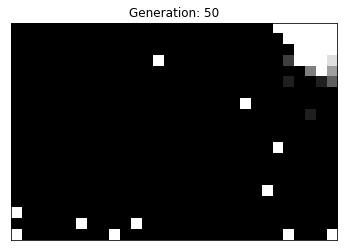

In [30]:
# Lösung

# Parameter der Simulation
hoehe = 20
breite = 30
anzahl_infizierte = 15
anzahl_tage = 50
ticklaenge = 0.1 # optional, Sie können die Funktion auch ohne 
                 # ticklaenge definieren, dann wird display_world 
                 # mit dem Standardwert 0.2 Sekunden aufgerufen.

# Definition der Funktion simuliere_ausbreitung:
# erstellt eine Population einer gegebenen Dimension 
# mit einer gegebenen Anzahl Infizierter (Ansteckender)
# und visualisiert die Simulation über eine gegebene Anzahl Tage
def simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage, ticklaenge=0.2):
    welt = neue_welt(hoehe, breite, anzahl_infizierte)
    display_world(welt, anzahl_tage, tick_length=ticklaenge)

# Aufruf der Funktion simuliere_ausbreitung
simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage)

### 2.5. Anpassung der Visualisierung

Nun möchten Sie Ihre Visualisierung noch ein wenig anpassen, um sie etwas aussagekräftiger zu machen.

*Passen Sie zum Lösen der Aufgaben 12 bis 14 den nachstehenden Code der Funktion `display_world` an.*

#### 2.5.1. Aufgabe 12 – Titel um Informationen ergänzen

Der **Titel** soll neu folgendermassen aussehen:  
Tag: ... (gesund: ..., krank: ..., genesen: ...)  

<details>
    <summary>
        Hinweis
    </summary>
    
Verwenden Sie die Funktion `np.sum()`, um die Anzahl Zellen zu finden, deren Zustand eine gewisse Bedingung erfüllt und passen Sie in der Funktion `display_world` den Titel um die gewünschte Information an.
    
</details>


<details>
    <summary>
        Lösung
    </summary>
    
```Python
plt.title("Tag: " + str(i+1) 
    + "\n (gesund: " + str((world == 0).sum()) 
    + " krank: " + str((world < 8).sum()-(world ==0).sum()) 
    + " genesen: " + str((world == 8).sum()) + ")")    
```
</details>

#### 2.5.2. Aufgabe 13 – Farbschema anpassen
    
Das Farbschema sollte etwas aussagekräftiger sein.  

Verwenden Sie `plt.cm.gist_heat_r` und fixieren Sie die Skala mit den Parametern `vmin` (niedrigster darzustellender Wert) und `vmax` (höchster darzustellender Wert):  

<details>
    <summary>
        Hinweis
    </summary>
    
Passen Sie den Aufruf der Funktion `plt.imshow` an.

</details>    
    
<details>
    <summary>
        Lösung
    </summary>
    
```Python
plt.imshow(world, cmap=plt.cm.gist_heat_r, vmin=0, vmax=8)
```
</details>

    
#### 2.5.3. Aufgabe 14 – Legende anzeigen
Sie möchten die Legende anzeigen.
    
Dazu können Sie die Funktion [`plt.colorbar()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.colorbar.html) aus PyPlot verwenden.

<details>
    <summary>
        Hinweis
    </summary>

Rufen Sie die Funktion `plt.colorbar` auf.
</details>

<details>
    <summary>
        Lösung
    </summary>

```Python    
plt.colorbar()
```
</details>

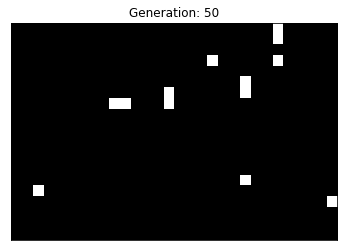

In [20]:
# Passen Sie für die Aufgaben 12 bis 14 die Funktion display_world an.

def display_world(world, number_of_iterations, tick_length=0.4):
    """Display the evolution of world for 
    the next number_of_iterations"""
    
    for i in range(number_of_iterations):
        
        # Den Output der aktuellen Zelle (des Jupyter Notebooks) löschen
        # parameter wait: Soll gewartet werden, bis der neue Output bereitsteht?
        display.clear_output(wait=True)
        
        # Beschriftung der x- und y-Achsen des Plots deaktivieren
        plt.xticks([]), plt.yticks([])
        
        # Anzeige der aktuellen Generation als Titel
        plt.title("Generation: " + str(i+1))
        
        # Welt anzeigen
        plt.imshow(world, cmap=plt.cm.gray_r)
        
        # Plot anzeigen 
        plt.show()
        
        # Die nächste Generation berechnen (Aufruf der oben definierten Funktion)
        iterate(world)
                
        # Warten (tick_length Sekunden)
        time.sleep(tick_length)

simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage)

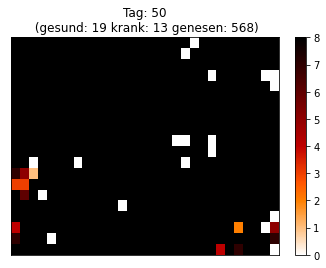

In [31]:
# Lösung der Aufgaben 12 bis 14: Angepasste Funktion display_world

def display_world(world, number_of_iterations, tick_length=0.4):
    """Display the evolution of world for 
    the next number_of_iterations"""
    for i in range(number_of_iterations):
        
        # Den Output der aktuellen Zelle (des Jupyter Notebooks) löschen
        # parameter wait: Soll gewartet werden, bis der neue Output bereitsteht?
        display.clear_output(wait=True)
        
        # Beschriftung der x- und y-Achsen des Plots deaktivieren
        plt.xticks([]), plt.yticks([])
        
        # Titel (Lösung der Aufgabe 12)        
        plt.title("Tag: " + str(i+1) 
                  + "\n (gesund: " + str((world == 0).sum()) 
                  + " krank: " + str((world < 8).sum()-(world ==0).sum()) 
                  + " genesen: " + str((world == 8).sum()) + ")")
        
        # Welt anzeigen (Lösung der Aufgabe 13: neues Farbschema, angepasst auf den Bereich von 0 bis 8)
        plt.imshow(world, cmap=plt.cm.gist_heat_r, vmin=0, vmax=8, aspect='auto')
        
        # Farblegende anzeigen (Lösung Aufgabe 14)
        plt.colorbar()
        
        # Plot anzeigen 
        plt.show()
        
        # Die nächste Generation berechnen (Aufruf der oben definierten Funktion)
        iterate(world)
        
        # Warten (tick_length Sekunden)
        time.sleep(tick_length)
        
simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage)

## 3. Simulieren

Nun können Sie Ihre Simulation laufen lassen, die einzelnen Parameter verändern und beobachten, welchen Effekt diese haben.

Das Beispiel geht von einer Population von 2000 Individuen aus (50x40 Zellen) und 20 Infizierten, was einer initialen Infektionsrate von 10 Promille (1 Prozent) entspricht. Simuliert wird über 7 Wochen (49 Tage).

Wie lange geht es, bis Ihre Population durchseucht ist? Wie viele Zellen werden nicht infiziert?

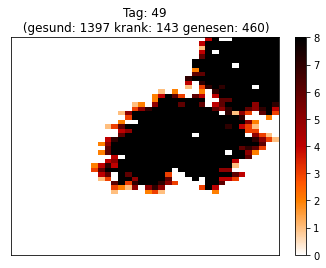

In [32]:
# Parameter Ihrer Simulation

hoehe = 50 
breite = 40 
anzahl_infizierte = 2
anzahl_tage = 49

simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage)

## 4. Simulation weiterentwickeln

Interessant wäre es nun, mehr zu sehen: Wie steil/flach ist beispielsweise die Ansteckungskurve?

In diesem Teil generieren Sie eine Anzeige wie folgt:
<img src="images/pandemie_graphen.png" alt="mehrere Graphen" width="50%"/>

### 4.1. Detailinformationen speichern und anzeigen

Um die Anzahl gesunder, kranker und genesener Zellen pro Tag anzuzeigen, speichern Sie die entsprechenden Zahlen bei der Visualisierung, wo Sie die Daten beisammenhaben, am besten in entsprechenden Arrays.

#### 4.1.1. Aufgabe 15 – Detailinformationen speichern und anzeigen
Initialisieren Sie in der Funktion `display_world` die entsprechenden Arrays und schreiben Sie bei jedem Durchlaufen der Schleife, die für die Visualisierung einer Generation zuständig ist, den jeweiligen Wert in den Array.

<details>
    <summary>
        Hinweis
    </summary>

Verwenden Sie die Funktion `np.sum()`, um die Anzahl Zellen zu finden, deren Zustand eine gewisse Bedingung erfüllt und passen Sie in der Funktion `display_world` den Titel um die gewünschte Information an.
</details>


<details>
    <summary>
        Lösung
    </summary>

```Python
def display_world(world, number_of_iterations, tick_length=0.4):
    """Display the evolution of world for 
    the next number_of_iterations"""
    
    # Arrays vorbereiten
    gesund = np.zeros(number_of_iterations)
    krank = np.zeros(number_of_iterations)
    genesen = np.zeros(number_of_iterations)
            
    for i in range(number_of_iterations):
                
        # Anzahl gesunder, kranker und genesener Zellen ermitteln
        gesund[i] = (world == 0).sum()
        krank[i] = (world < 8).sum() - (world == 0).sum()
        genesen[i] = (world == 8).sum()
        ...
```

</details>

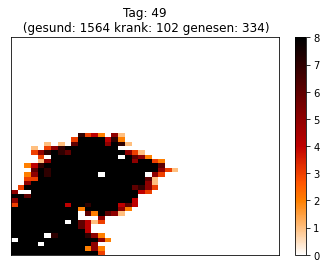

In [20]:
# Passen Sie für die Aufgabe 15 die Funktion display_world an.

def display_world(world, number_of_iterations, tick_length=0.4):
    """Display the evolution of world for 
    the next number_of_iterations"""
    for i in range(number_of_iterations):
        
        # Den Output der aktuellen Zelle (des Jupyter Notebooks) löschen
        # parameter wait: Soll gewartet werden, bis der neue Output bereitsteht?
        display.clear_output(wait=True)
        
        # Beschriftung der x- und y-Achsen des Plots deaktivieren
        plt.xticks([]), plt.yticks([])
        
        # Titel (Lösung der Aufgabe 12)        
        plt.title("Tag: " + str(i+1) 
                  + "\n (gesund: " + str((world == 0).sum()) 
                  + " krank: " + str((world < 8).sum()-(world ==0).sum()) 
                  + " genesen: " + str((world == 8).sum()) + ")")
        
        # Welt anzeigen (Lösung der Aufgabe 13: neues Farbschema, angepasst auf den Bereich von 0 bis 8)
        plt.imshow(world, cmap=plt.cm.gist_heat_r, vmin=0, vmax=8, aspect='auto')
        
        # Farblegende anzeigen (Lösung Aufgabe 14)
        plt.colorbar()
        
        # Plot anzeigen 
        plt.show()
        
        # Die nächste Generation berechnen (Aufruf der oben definierten Funktion)
        iterate(world)
        
        # Warten (tick_length Sekunden)
        time.sleep(tick_length)
        
simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage)

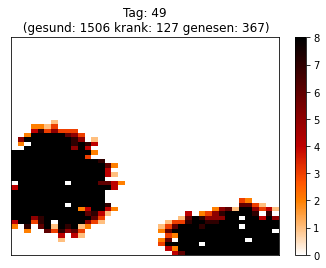

In [21]:
# Lösung der Aufgabe 15: Angepasste Funktion display_world

def display_world(world, number_of_iterations, tick_length=0.4):
    """Display the evolution of world for 
    the next number_of_iterations"""
    
    # Arrays vorbereiten (Lösung der Aufgabe 15, 1. Teil)
    gesund = np.zeros(number_of_iterations)
    krank = np.zeros(number_of_iterations)
    genesen = np.zeros(number_of_iterations)
            
    for i in range(number_of_iterations):
                
        # Anzahl gesunder, kranker und genesener Zellen ermitteln (Lösung der Aufgabe 15, 2. Teil)
        gesund[i] = (world == 0).sum()
        krank[i] = (world < 8).sum() - (world == 0).sum()
        genesen[i] = (world == 8).sum()
        
        # Den Output der aktuellen Zelle (des Jupyter Notebooks) löschen
        # parameter wait: Soll gewartet werden, bis der neue Output bereitsteht?
        display.clear_output(wait=True)
        
        # Beschriftung der x- und y-Achsen des Plots deaktivieren
        plt.xticks([]), plt.yticks([])
        
        # Titel (Lösung der Aufgabe 12)        
        plt.title("Tag: " + str(i+1) 
                  + "\n (gesund: " + str((world == 0).sum()) 
                  + " krank: " + str((world < 8).sum()-(world ==0).sum()) 
                  + " genesen: " + str((world == 8).sum()) + ")")
        
        # Welt anzeigen (Lösung der Aufgabe 13: neues Farbschema, angepasst auf den Bereich von 0 bis 8)
        plt.imshow(world, cmap=plt.cm.gist_heat_r, vmin=0, vmax=8, aspect='auto')
        
        # Farblegende anzeigen (Lösung Aufgabe 14)
        plt.colorbar()
        
        # Plot anzeigen 
        plt.show()
        
        # Die nächste Generation berechnen (Aufruf der oben definierten Funktion)
        iterate(world)
        
        # Warten (tick_length Sekunden)
        time.sleep(tick_length)

simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage)

## 4.2. Plots

Es gibt verschiedene Möglichkeiten, die Ausbreitung eines Krankheitserregers zu visualisieren. Hier werden Sie ein *Liniendiagramm* und ein *(gestapeltes) Balkendiagramm* sehen.

### 4.2.1. Linienplots

Im Cheatsheet finden Sie die folgenden Anweisungen zu Linienplots:

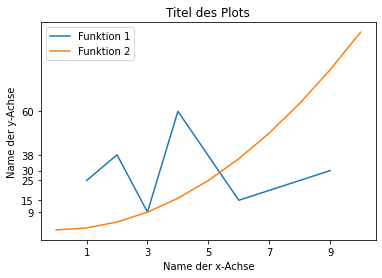

In [22]:
# Werte für x und y definieren:
# Hier wurden für x und y Listen verwendet. Sie können auch NumPy-Arrays verwenden.
x=[1,2,3,4,6,9]
y=[25,38,9,60,15,30]
# Plot definieren
plt.plot(x,y,label='Funktion 1')

# Werte für einen zweiten Plot definieren:
x1=np.arange(0,11,1)
y1=x1**2 # Quadratfunktion
# Zweiten Plot definieren:
plt.plot(x1,y1,label='Funktion 2')
# Achsennamen
plt.xlabel('Name der x-Achse')
plt.ylabel('Name der y-Achse')
# Achsenbeschriftung
plt.xticks(np.arange(1,11,step=2)) # von 1 bis und ohne 11 in Zweierschritten
plt.yticks(y)
# Titel des Plots
plt.title('Titel des Plots')
# Legende
plt.legend() 
# Plot anzeigen
plt.show()

#### 4.2.1.1. Aufgabe 16 – Linienplot

Ersetzen Sie nun den bisherigen Plot durch einen Linienplot, der die Linien für gesunde (blau), kranke (rot) und genesene (grün) Zellen anzeigt. Die Achsen sollen mit Werten in vernünftigen Abständen beschriftet sein, der Plot soll den Titel "Tag: ... (gesund: ..., krank: ..., genesen: ...)" sowie eine Legende haben.

<details>
    <summary>
        Hinweise
    </summary>

- Das Zeichen `\n` in einem String entspricht einem Zeilenumbruch.
    
- Um für die Achsenbeschriftung vernünftige Werte zu bekommen, können Sie entweder Ticks auf die Höhe, bzw. Breite verteilen oder noch einfacher gar nichts definieren und es dem Standardverhalten von PyPlot überlassen.
    
- `plt.plot(daten, 'tab:blue', label="Daten")` zeichnet eine blaue Linie mit den Werten des Arrays daten und macht eine Legende mit dem Namen "Daten".

</details>


<details>
    <summary>
        Lösung
    </summary>
    
Zeilen 23 bis 39 ersetzen durch:

```Python
# Beschriftung der x- und y-Achsen
# Keine besondere Beschriftung der x- und y-Achsen:
# plt.xticks und plt.yticks nicht definieren        

# Titel       
plt.title("Tag: " + str(i+1) 
    + "\n (gesund: " + str((world == 0).sum()) 
    + " krank: " + str((world < 8).sum()-(world ==0).sum()) 
    + " genesen: " + str((world == 8).sum()) + ")")
        
# Linien plotten
plt.plot(gesund, 'tab:blue', label="gesund")
plt.plot(krank, 'tab:red', label="krank")
plt.plot(genesen, 'tab:green', label="genesen")
        
# Legende anzeigen
plt.legend()
        
# Plot anzeigen 
plt.show()
```
</details>

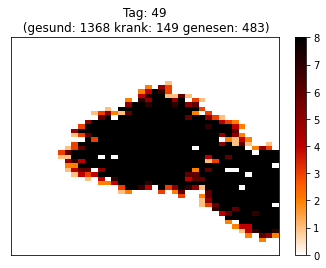

In [23]:
# Passen Sie für die Aufgabe 16 die Funktion display_world an.

def display_world(world, number_of_iterations, tick_length=0.4):
    """Display the evolution of world for 
    the next number_of_iterations"""
    
    # Arrays vorbereiten (Lösung der Aufgabe 15, 1. Teil)
    gesund = np.zeros(number_of_iterations)
    krank = np.zeros(number_of_iterations)
    genesen = np.zeros(number_of_iterations)
            
    for i in range(number_of_iterations):
                
        # Anzahl gesunder, kranker und genesener Zellen ermitteln (Lösung der Aufgabe 15, 2. Teil)
        gesund[i] = (world == 0).sum()
        krank[i] = (world < 8).sum() - (world == 0).sum()
        genesen[i] = (world == 8).sum()
        
        # Den Output der aktuellen Zelle (des Jupyter Notebooks) löschen
        # parameter wait: Soll gewartet werden, bis der neue Output bereitsteht?
        display.clear_output(wait=True)
        
        # Beschriftung der x- und y-Achsen des Plots deaktivieren
        plt.xticks([]), plt.yticks([])
        
        # Titel (Lösung der Aufgabe 12)        
        plt.title("Tag: " + str(i+1) 
                  + "\n (gesund: " + str((world == 0).sum()) 
                  + " krank: " + str((world < 8).sum()-(world ==0).sum()) 
                  + " genesen: " + str((world == 8).sum()) + ")")
        
        # Welt anzeigen (Lösung der Aufgabe 13: neues Farbschema, angepasst auf den Bereich von 0 bis 8)
        plt.imshow(world, cmap=plt.cm.gist_heat_r, vmin=0, vmax=8, aspect='auto')
        
        # Farblegende anzeigen (Lösung Aufgabe 14)
        plt.colorbar()
        
        # Plot anzeigen 
        plt.show()
        
        # Die nächste Generation berechnen (Aufruf der oben definierten Funktion)
        iterate(world)
        
        # Warten (tick_length Sekunden)
        time.sleep(tick_length)
        
simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage)

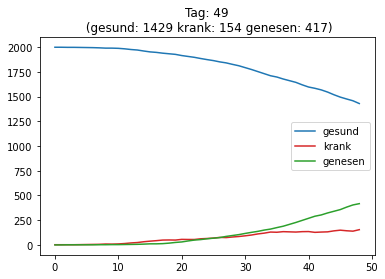

In [24]:
# Lösung der Aufgabe 16: Angepasste Funktion display_world

def display_world(world, number_of_iterations, tick_length=0.4):
    """Display the evolution of world for 
    the next number_of_iterations"""
    
    # Arrays vorbereiten (Lösung der Aufgabe 15, 1. Teil)
    gesund = np.zeros(number_of_iterations)
    krank = np.zeros(number_of_iterations)
    genesen = np.zeros(number_of_iterations)
            
    for i in range(number_of_iterations):
                
        # Anzahl gesunder, kranker und genesener Zellen ermitteln (Lösung der Aufgabe 15, 2. Teil)
        gesund[i] = (world == 0).sum()
        krank[i] = (world < 8).sum() - (world == 0).sum()
        genesen[i] = (world == 8).sum()
        
        # Den Output der aktuellen Zelle (des Jupyter Notebooks) löschen
        # parameter wait: Soll gewartet werden, bis der neue Output bereitsteht?
        display.clear_output(wait=True)
        
        # ------ Lösung der Aufgabe 16 ------
        # ##### Anzeige der Linienplots #####

        # Keine besondere Beschriftung der x- und y-Achsen:
        # plt.xticks und plt.yticks nicht definieren
        
        # Titel       
        plt.title("Tag: " + str(i+1) 
                  + "\n (gesund: " + str((world == 0).sum()) 
                  + " krank: " + str((world < 8).sum()-(world ==0).sum()) 
                  + " genesen: " + str((world == 8).sum()) + ")")
        
        # Linien zeichnen
        plt.plot(gesund, 'tab:blue', label="gesund")
        plt.plot(krank, 'tab:red', label="krank")
        plt.plot(genesen, 'tab:green', label="genesen")
        
        # Legende anzeigen
        plt.legend()
        
        # Plot anzeigen 
        plt.show()
        
        # -----------------------------------
        
        # Die nächste Generation berechnen (Aufruf der oben definierten Funktion)
        iterate(world)
        
        # Warten (tick_length Sekunden)
        time.sleep(tick_length)        
        
simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage)

---

**Einschub**

Um für die Erstellung weiterer Plots realistische Daten zu haben, können Sie die Funktion `display_world` um die Rückgabe der Liste `[gesund, krank, genesen]` erweitern und die Werte in neuen Arrays speichern.

<details>
    <summary>
        Code
    </summary>
    
```Python  
def display_world(world, number_of_iterations, tick_length=0.4):
    """Display the evolution of world for 
    the next number_of_iterations"""
    
    # Arrays vorbereiten (Lösung der Aufgabe 15, 1. Teil)
    gesund = np.zeros(number_of_iterations)
    krank = np.zeros(number_of_iterations)
    genesen = np.zeros(number_of_iterations)
            
    for i in range(number_of_iterations):
                
        # Anzahl gesunder, kranker und genesener Zellen ermitteln (Lösung der Aufgabe 15, 2. Teil)
        gesund[i] = (world == 0).sum()
        krank[i] = (world < 8).sum() - (world == 0).sum()
        genesen[i] = (world == 8).sum()
        
        # Den Output der aktuellen Zelle (des Jupyter Notebooks) löschen
        # parameter wait: Soll gewartet werden, bis der neue Output bereitsteht?
        display.clear_output(wait=True)
        
        # ----- Lösung der Aufgabe 16: ------
        
        ### Anzeige der Linienplots
        # Keine besondere Beschriftung der x- und y-Achsen:
        # plt.xticks und plt.yticks nicht definieren
        
        # Titel       
        plt.title("Tag: " + str(i+1) + "\n (gesund: " + str((world == 0).sum()) + " krank: " + str((world < 8).sum()-(world ==0).sum()) + " genesen: " + str((world == 8).sum()) + ")")
        
        # Linien zeichnen
        plt.plot(gesund, 'tab:blue', label="gesund")
        plt.plot(krank, 'tab:red', label="krank")
        plt.plot(genesen, 'tab:green', label="genesen")
        
        # Legende anzeigen
        plt.legend()
        
        # Plot anzeigen 
        plt.show()
        
        # ----------------------------------
        
        # Die nächste Generation berechnen (Aufruf der oben definierten Funktion)
        iterate(world)
        
        # Warten (tick_length Sekunden)
        time.sleep(tick_length)        

    return [gesund, krank, genesen]

welt = neue_welt(hoehe, breite, anzahl_infizierte)
[gesunde, kranke, genesene] = display_world(welt, anzahl_tage)

print(gesunde)
print(kranke)
print(genesene)
# Die Outputs dieser Prints können Sie dann kopieren und 
# die Punkte bis auf den letzten durch Kommas ersetzen...
```

</details>

Durch Kopieren der Outputs und Ersetzen der Punkte durch Kommas (wobei das letzte Komma jeweils gelöscht werden muss), konnten die folgenden Arrays erstellt werden. Sie können Sie zum Erstellen der weiteren Visualisierungen verwenden.

In [25]:
gesunde=np.array([
    1980, 1962, 1942, 1906, 1859, 1812, 1755, 1697, 1625, 1557, 1487, 1398,
    1322, 1239, 1155, 1062,  977,  884,  805,  717,  640,  560,  483,  433,
     379,  326,  273,  232,  197,  163,  135,  109,   93,   85,   76,   67,
      59,   55,   50,   48,   44,   42,   41,   39,   35,   35,   34,   34,
      34,   33])
kranke=np.array([ 
    20,  36,  53,  87, 130, 174, 230, 283, 337, 385, 419, 461, 490, 516,
   542, 563, 580, 603, 593, 605, 599, 595, 579, 544, 505, 479, 444, 408,
   363, 320, 298, 270, 233, 188, 156, 130, 104,  80,  59,  45,  41,  34,
    26,  20,  20,  15,  14,  10,   8,   8])
genesene=np.array([   
    0,    2,    5,    7,   11,   14,   15,   20,   38,   58,   94,  141,
  188,  245,  303,  375,  443,  513,  602,  678,  761,  845,  938, 1023,
 1116, 1195, 1283, 1360, 1440, 1517, 1567, 1621, 1674, 1727, 1768, 1803,
 1837, 1865, 1891, 1907, 1915, 1924, 1933, 1941, 1945, 1950, 1952, 1956,
 1958, 1959])

Der Linienplot mit diesen Werten ist der Folgende:

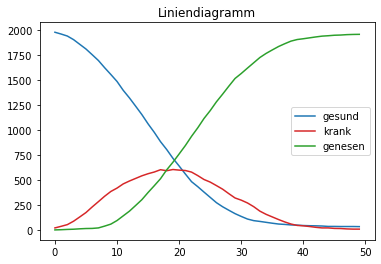

In [26]:
# Titel       
plt.title("Liniendiagramm")

# Linien zeichnen
plt.plot(gesunde, 'tab:blue', label="gesund")
plt.plot(kranke, 'tab:red', label="krank")
plt.plot(genesene, 'tab:green', label="genesen")

# Legende anzeigen
plt.legend()

# Plot anzeigen 
plt.show()

### 4.2.2. Gestapelte Balkendiagramme

Nun werden Sie ein gestapeltes Balkendiagramm erstellen. Wie bisher sollen gesunde Zellen blau, kranke rot und genesene Zellen grün anzeigt werden.

Wie der Name sagt, bestehen "gestapelte" Balkendiagramme aus Balken, die aufeinandergestapelt werden.

**Balkendiagramme** können mit der Funktion [`bar(x, height, width=0.8, bottom=None, align='center', data=None)`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html) aus `matplotlib` erstellt werden.

Argumente der Funktion `bar`:

* `x`: x-Koordinaten der Balken

* `height`: Höhe der Balken (Werte, die als Balken dargestellt werden)

optionale Argumente:

* `width`: Breite der Balken  
  `width=1`: ganze zur Verfügung stehende Breite; kein leerer Bereich zwischen den Balken.
* `bottom`: y-Koordinaten am *unteren Rand* der Balken  
  **bei *gestapelten* Balken**
  
* `align`:  
  mögliche Werte: `center` (zentriert um den Tick auf der x-Achse) oder `edge` (Tick auf der x-Achse bündig mit dem linken Rand des Balkens (rechtsbündig bei negativer Balkenbreite (`width` negativ))
  
#### 4.2.2.1. Einfaches Balkendiagramm

Um die Werte des Arrays `kranke` als Balken darzustellen, rufen Sie die Funktion `bar` von NumPy mit dem Parameter `height=kranke` auf.

Wie beim Liniendiagramm können Sie die Beschriftung der x- und y-Achse NumPy überlassen.

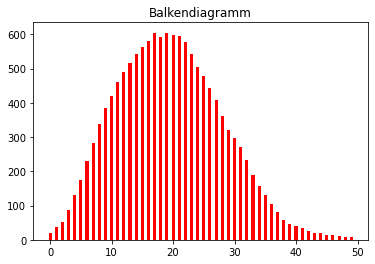

In [27]:
# Balkenindex (x-Koordinaten der Balken)
anzahl_tage=len(kranke)
bar_index = np.arange(anzahl_tage) 
# Balkenbreite (1 bedeutet bis zum nächsten Balken)
bar_width = 0.5

#Titel
plt.title("Balkendiagramm")

# Keine besondere Beschriftung der x- und y-Achsen:
# plt.xticks und plt.yticks nicht definieren
                
# Balkendiagramm
plt.bar(bar_index, height=kranke, width=bar_width, label='krank', color='red')
        
# Plot anzeigen 
plt.show()

#### 4.2.2.2. Gestapeltes Balkendiagramm

Um gesunde, kranke und genesene Zellen anzuzeigen, können Sie nun die entsprechenden Balken *stapeln*.

Der Parameter `bottom` der Funktion `bar` entspricht dem y-Wert des unteren Rands der Balken.

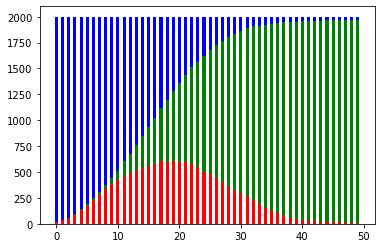

In [28]:
# Balkenindex
anzahl_tage=len(kranke)
bar_index = np.arange(anzahl_tage) 
# Balkenbreite (1 bedeutet: bis zum näcnsten Balken)
bar_width = 0.5       
        

# Keine besondere Beschriftung der x- und y-Achsen:
# plt.xticks und plt.yticks nicht definieren
                
# (Gestapelte) Balkendiagramme 
# der Parameter bottom steht für den y-Wert am unteren Rand des Balkens
plt.bar(bar_index, height=kranke, width=bar_width, label='krank', color='red')
plt.bar(bar_index, height=genesene, width=bar_width, label='genesen', bottom=kranke, color='green')
plt.bar(bar_index, height=gesunde, width=bar_width, label='gesund', bottom=kranke+genesene, color='blue')
        
# Plot anzeigen 
plt.show()

#### 4.2.2.3. Aufgabe 17 – In der Funktion `display_world` ein gestapeltes Balkendiagramm anzeigen

Nun können Sie den Plot der Welt in der Funktion `display_world` durch ein gestapeltes Balkendiagramm ersetzen. Die Breite der Balken soll 1 betragen.

<details>
    <summary>
        Hinweise
    </summary>

- Sie können den Code von 4.2.2.2. verwenden,
    
- müssen aber `bar_width` anpassen.
</details>


<details>
    <summary>
        Lösung
    </summary>
    
Zeilen 23 bis 39 ersetzen durch:

```Python
# Balkenindex
bar_index = np.arange(number_of_iterations) 
# Balkenbreite (1 bedeutet: bis zum näcnsten Balken)
bar_width = 1       
        
# Beschriftung der x- und y-Achsen
# Keine besondere Beschriftung der x- und y-Achsen:
# plt.xticks und plt.yticks nicht definieren
                            
# (Gestapelte) Balkendiagramme 
# der Parameter bottom steht für den y-Wert am unteren Rand des Balkens
plt.bar(bar_index, height=krank, width=bar_width, label='krank', color='red')
plt.bar(bar_index, height=genesen, width=bar_width, label='genesen', bottom=krank, color='green')
plt.bar(bar_index, height=gesund, width=bar_width, label='gesund', bottom=krank+genesen, color='blue')
        
# Plot anzeigen 
plt.show()
```
</details>

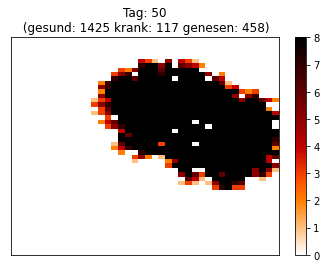

In [29]:
# Passen Sie für die Aufgabe 17 die Funktion display_world an.

def display_world(world, number_of_iterations, tick_length=0.4):
    """Display the evolution of world for 
    the next number_of_iterations"""
    
    # Arrays vorbereiten (Lösung der Aufgabe 15, 1. Teil)
    gesund = np.zeros(number_of_iterations)
    krank = np.zeros(number_of_iterations)
    genesen = np.zeros(number_of_iterations)
            
    for i in range(number_of_iterations):
                
        # Anzahl gesunder, kranker und genesener Zellen ermitteln (Lösung der Aufgabe 15, 2. Teil)
        gesund[i] = (world == 0).sum()
        krank[i] = (world < 8).sum() - (world == 0).sum()
        genesen[i] = (world == 8).sum()
        
        # Den Output der aktuellen Zelle (des Jupyter Notebooks) löschen
        # parameter wait: Soll gewartet werden, bis der neue Output bereitsteht?
        display.clear_output(wait=True)
        
        # Beschriftung der x- und y-Achsen des Plots deaktivieren
        plt.xticks([]), plt.yticks([])
        
        # Titel (Lösung der Aufgabe 12)        
        plt.title("Tag: " + str(i+1) 
                  + "\n (gesund: " + str((world == 0).sum()) 
                  + " krank: " + str((world < 8).sum()-(world ==0).sum()) 
                  + " genesen: " + str((world == 8).sum()) + ")")
        
        # Welt anzeigen (Lösung der Aufgabe 13: neues Farbschema, angepasst auf den Bereich von 0 bis 8)
        plt.imshow(world, cmap=plt.cm.gist_heat_r, vmin=0, vmax=8, aspect='auto')
        
        # Farblegende anzeigen (Lösung Aufgabe 14)
        plt.colorbar()
        
        # Plot anzeigen 
        plt.show()
        
        # Die nächste Generation berechnen (Aufruf der oben definierten Funktion)
        iterate(world)
        
        # Warten (tick_length Sekunden)
        time.sleep(tick_length)
        
simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage)

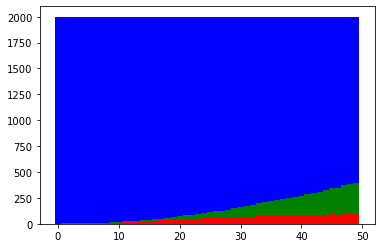

In [30]:
# Lösung der Aufgabe 17: Angepasste Funktion display_world

def display_world(world, number_of_iterations, tick_length=0.4):
    """Display the evolution of world for 
    the next number_of_iterations"""
    
    # Arrays vorbereiten (Lösung der Aufgabe 15, 1. Teil)
    gesund = np.zeros(number_of_iterations)
    krank = np.zeros(number_of_iterations)
    genesen = np.zeros(number_of_iterations)
            
    for i in range(number_of_iterations):
                
        # Anzahl gesunder, kranker und genesener Zellen ermitteln (Lösung der Aufgabe 15, 2. Teil)
        gesund[i] = (world == 0).sum()
        krank[i] = (world < 8).sum() - (world == 0).sum()
        genesen[i] = (world == 8).sum()
        
        # Den Output der aktuellen Zelle (des Jupyter Notebooks) löschen
        # parameter wait: Soll gewartet werden, bis der neue Output bereitsteht?
        display.clear_output(wait=True)
        
        # ------ Lösung der Aufgabe 17 ------
        # # Anzeige der gestapelten Balken  #
        
        # Balkenindex
        bar_index = np.arange(number_of_iterations) 
        # Balkenbreite (1 bedeutet: bis zum näcnsten Balken)
        bar_width = 1       
        
        # Beschriftung der x- und y-Achsen
        # Keine besondere Beschriftung der x- und y-Achsen:
        # plt.xticks und plt.yticks nicht definieren
                            
        # (Gestapelte) Balkendiagramme 
        # der Parameter bottom steht für den y-Wert am unteren Rand des Balkens
        plt.bar(bar_index, height=krank, width=bar_width, label='krank', color='red')
        plt.bar(bar_index, height=genesen, width=bar_width, label='genesen', bottom=krank, color='green')
        plt.bar(bar_index, height=gesund, width=bar_width, label='gesund', bottom=krank+genesen, color='blue')
        
        # Plot anzeigen 
        plt.show()
        
        # -----------------------------------
        
        # Die nächste Generation berechnen (Aufruf der oben definierten Funktion)
        iterate(world)
        
        # Warten (tick_length Sekunden)
        time.sleep(tick_length)
        
simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage)

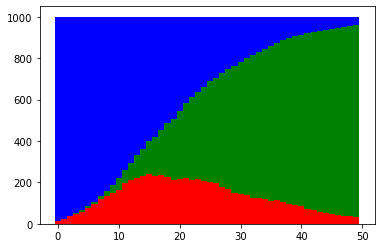

In [31]:
hoehe = 20
breite = 50 
anzahl_infizierte = 15
anzahl_tage = 50

simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage)

### 4.3. Plots nebeneinander anzeigen

Nun haben Sie in der Funktion `display_world` den Plot der Welt durch ein Linien- und durch verschiedene Balkendiagramme ersetzt. Das Ziel besteht aber immer noch darin, alle drei Plots nebeneinander darzustellen, um viel aus der Simulation herauszulesen.

Um mehrere Plots anzuzeigen, werden die einzelnen Plots als Subplots eines `figure`-Objekts definieren.

Mit `figsize`kann die Grösse der Grafik festgelegt werden. Durch Ausprobieren finden Sie einen geeigneten Wert. `(15,15)` scheint in einer angenehmen Grösse zu resultieren.

Der Aufruf von `subplot(anzahl_zeilen, anzahl_spalten, plot_index)` mit den Argumenten 1,3,1 bedeutet, Ihr Subplot ist auf *eine* Zeile verteilt, die *drei* Spalten aufweist und der entsprechende Plot ist der *erste*.

#### 4.3.1. Beispiele

Im Folgenden sehen Sie zwei Beispiele, bevor Sie die drei Plots wie im Bild in der Einleitung unter Punkt 4 darstellen können.

##### 4.3.1.1. Zwei Linienplots nebeneinander anzeigen

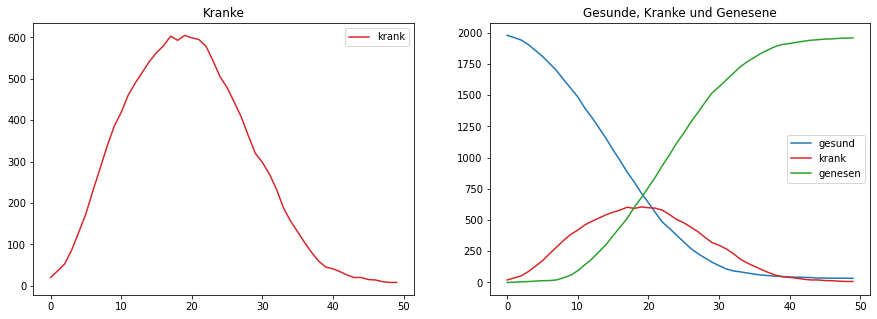

In [32]:
# Breite des Outputs vergrössern
figure = plt.figure(figsize=(15,5))
        
## 1. Subplot (Linien)
subplot1 = figure.add_subplot(1,2,1)
subplot1.set_title("Kranke")
# Linie zeichnen
subplot1.plot(kranke, 'tab:red', label="krank")
# Legende anzeigen
subplot1.legend()

## 2. Subplot (Linien)
subplot2 = figure.add_subplot(1,2,2)
# Titel
subplot2.set_title("Gesunde, Kranke und Genesene")
# Linien zeichnen
subplot2.plot(gesunde, 'tab:blue', label="gesund")
subplot2.plot(kranke, 'tab:red', label="krank")
subplot2.plot(genesene, 'tab:green', label="genesen")

# Legende anzeigen
subplot2.legend()

# Plots anzeigen 
plt.show()

##### 4.3.1.2. Vier Plots auf zwei Zeilen anzeigen

Um vier Linienplots auf zwei Zeilen zu erhalten, erhöhen Sie den letzten Parameter (also den, welcher angibt, um den wievielten Graphen es sich handelt) für jeden Graphen um eins.

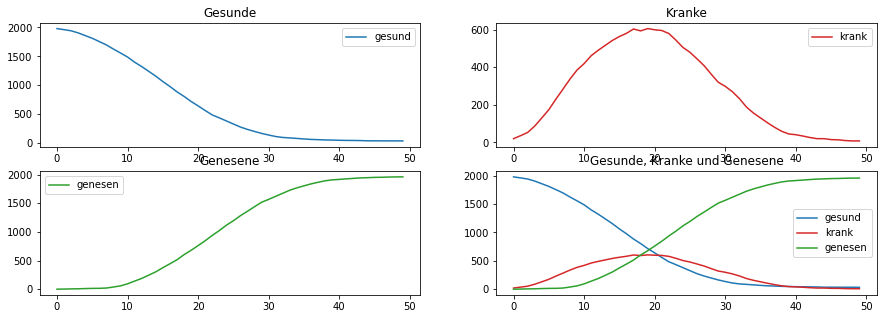

In [33]:
# Breite des Outputs vergrössern
figure = plt.figure(figsize=(15,5))
        
## 1. Subplot (Linien)
subplot1 = figure.add_subplot(2,2,1) # 2 Zeilen, 2 Spalten, der 1. Graph
subplot1.set_title("Gesunde")
# Linie zeichnen
subplot1.plot(gesunde, 'tab:blue', label="gesund")
# Legende anzeigen
subplot1.legend()

## 2. Subplot (Linien)
subplot2 = figure.add_subplot(2,2,2) # 2 Zeilen, 2 Spalten, der 2. Graph
# Titel
subplot2.set_title("Kranke")
# Linien zeichnen
subplot2.plot(kranke, 'tab:red', label="krank")
# Legende anzeigen
subplot2.legend()
        
## 3. Subplot (Linien)
subplot3 = figure.add_subplot(2,2,3) # 2 Zeilen, 2 Spalten, der 3. Graph
subplot3.set_title("Genesene")
# Linien zeichnen
subplot3.plot(genesene, 'tab:green', label="genesen")
# Legende anzeigen
subplot3.legend()

## 2. Subplot (Linien)
subplot4 = figure.add_subplot(2,2,4) # 2 Zeilen, 2 Spalten, der 4. Graph
subplot4.set_title("Gesunde, Kranke und Genesene")
# Linien zeichnen
subplot4.plot(gesunde, 'tab:blue', label="gesund")
subplot4.plot(kranke, 'tab:red', label="krank")
subplot4.plot(genesene, 'tab:green', label="genesen")

# Legende anzeigen
subplot4.legend()

# Plots anzeigen 
plt.show()

##### 4.3.2. Drei Plots (Welt, Kurven und gestapelte Balken) nebeneinander anzeigen

Nun sind Sie bereit, die Welt, das Linien- und das gestapelte Balkendiagramm nebeneinander zu platzieren.

Es ist einiges anders als biher:

* Um die Subplots zu aktialisieren, werden sie mit `clear` gelöscht und anschliessend neu gezeichnet.  Passen Sie den Code der Funktion `display_world` an, um die drei Plots nebeneinander darzustellen.

* Für Plots werden Achsenbeschriftungen werden mit den Funktionen `x_ticks` und `y_ticks` definiert, für Subplots mit `set_xticks()` und `set_yticks()`.  
  Genauso ist es mit den Titeln (`set_title` anstelle von `title`).
  
* Die Farblegende wird zur Figure erstellt, der zugehörige Subplot kann optional als Argument ax mitgegeben werden. Sie muss nur einmal gezeichnet werden.  
```Python
if i == 0:
    figure.colorbar(img, ax=ax1)
```
* Die Subplots sind genaugenommen "Axes-Objekte" und werden hier mit `ax1` bis `ax3` statt wie oben (Punkte 4.3.1.1. und 4.3.1.2. mit `subplot1` bis `subplot3`). Variablennamen können jeweils frei gewählt werden, allerdings werden Subplots in Beispielen im Internet meistens mit *ax* bezeichnet.
  
* Der Output der Zelle wird nicht mehr am Anfang der Schleife gelöscht. Am Ende der Schlaufe wird `clear_output` aufgerufen. Die Funktion wird neu direkt importiert:  
  `from IPython.display import display, clear_output`

* `plt.show()` wird nicht mehr aufgerufen.

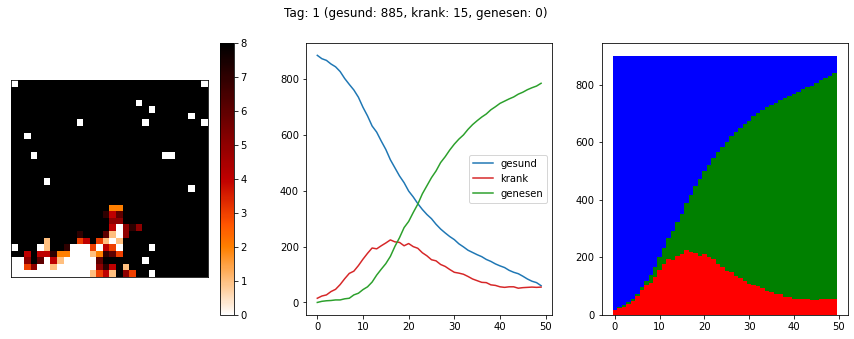

In [34]:
import numpy as np # NumPy: Bibliothek für numerische Berechnungen
import matplotlib.pyplot as plt # PyPlot: Bibliothek für Visualisierungen (Plots)
from IPython.display import display, clear_output # Jupyter-Notebook-spezifische Bibliothek
import time # ebenfalls Jupyter-Notebook-spezifisch, kann aber mit PyPlot gelöst werden

def display_world(world, number_of_iterations, tick_length=0.4):
    """Display the evolution of world for 
    the next number_of_iterations"""
    
    # Arrays vorbereiten (Lösung der Aufgabe 15, 1. Teil)
    gesund = np.zeros(number_of_iterations)
    krank = np.zeros(number_of_iterations)
    genesen = np.zeros(number_of_iterations)  
    
    # -----------------------------------
    # Vorbereitungen für die Anzeige der drei Plots
    # Für den Plot ein Figureobjekt definieren
    # (Sie können sich die Figure wie einen Platzhalter für den Plot vorstellen)
    figure = plt.figure(figsize=(15, 5))

    # 3 (Sub)plots nebeneinander in der figure definieren
    ax1 = figure.add_subplot(1, 3, 1)  # 1. Subplot (Welt) # 1 Zeile, 3 Spalten, der 1. Graph
    ax2 = figure.add_subplot(1, 3, 2)  # 2. Subplot (Kurven) # 1 Zeile, 3 Spalten, der 2. Graph
    ax3 = figure.add_subplot(1, 3, 3)  # 3. Subplot (Balken) # 1 Zeile, 3 Spalten, der 3. Graph  

    # -----------------------------------
    
    for i in range(number_of_iterations):
        
        # Anzahl gesunder, kranker und genesener Zellen ermitteln
        gesund[i] = (world == 0).sum()
        krank[i] = (world < 8).sum() - (world == 0).sum()
        genesen[i] = (world == 8).sum()
        
        # -----------------------------------
        # Die 3 Sublots zeichnen:

        # 1. Subplot (Welt)
        # Welt darstellen
        # Zuerste den alten Subplot löschen
        ax1.clear()
        # keine Beschriftung der x- und y-Achsen
        ax1.set_xticks([]), ax1.set_yticks([])
        # Welt zeichnen
        img = ax1.imshow(world, cmap=plt.cm.gist_heat_r, vmin=0, vmax=8)
        # Farblegende zum Subplot definieren (als Teil der Figure nur einmal nötig)
        if i == 0:
            figure.colorbar(img, ax=ax1)            

        ## 2. Subplot (Linien)
        # Linien zeichnen
        # Zuerst das alte Diagramm leeren, anschliessend die Linien neu zeichnen
        ax2.clear()
        ax2.plot(gesund, 'tab:blue', label='gesund')
        ax2.plot(krank, 'tab:red', label='krank')
        ax2.plot(genesen, 'tab:green', label='genesen')
        # Legende anzeigen
        ax2.legend()

        ## 3. Subplot (Gestapelte Balken)
        # Balkenindex
        bar_index = np.arange(number_of_iterations)
        # Balkenbreite (1 bedeutet: bis zum näcnsten Balken)
        bar_width = 1
        # Balken zeichnen
        # der Parameter bottom steht für den Wert am unteren Rand des Balkens
        # Zuerst das alte Diagramm leeren, anschliessend die Balken neu zeichnen
        ax3.clear()
        ax3.bar(bar_index, krank, bar_width, label='krank', color='red')
        ax3.bar(bar_index, genesen, bar_width, label='genesen', bottom=krank, color='green')
        ax3.bar(bar_index, gesund, bar_width, label='gesund', bottom=krank+genesen, color='blue')

        # Titel der Figure definieren (den 3 Subplots übergeordnet)
        if i == 0:
            figure.suptitle("Tag: " + str(i+1)
                            + " (gesund: " + str((world == 0).sum())
                            + ", krank: " + str((world < 8).sum()-(world == 0).sum())
                            + ", genesen: " + str((world == 8).sum()) + ")")

        # -----------------------------------

        # Die nächste Generation berechnen (Aufruf der oben definierten Funktion)
        iterate(world)

        # Anzeige des Plots (ausserhalb von Jupyter; wäre hier aber auch "erlaubt")
        display(figure)
        
        # Den Output der aktuellen Zelle (des Jupyter Notebooks) löschen
        # parameter wait: Soll gewartet werden, bis der neue Output bereitsteht?
        clear_output(wait=True)

        # Warten (tick_length Sekunden)
        time.sleep(tick_length)
        
        
hoehe = 30
breite = 30 
anzahl_infizierte = 15
anzahl_tage = 50  
        
simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage)        

### 4.4. Simulieren

Nun haben Sie eine vielfältigere Anzeige. Sie können nun die Parameter ändern, die Simulation laufen lassen und beobachten, welchen Effekt die Parameter haben.

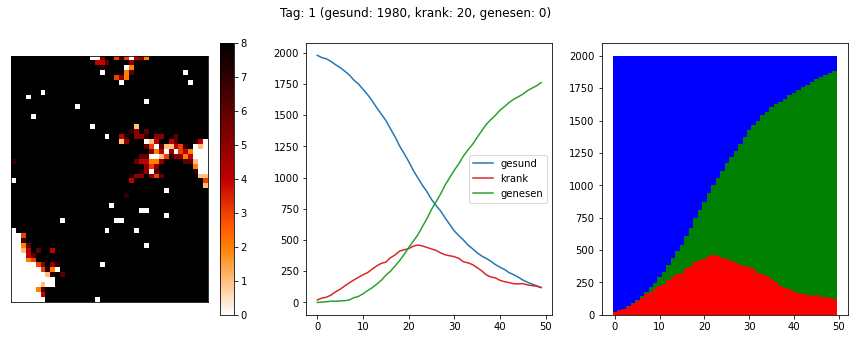

In [35]:
hoehe = 50
breite = 40 
anzahl_infizierte = 20
anzahl_tage = 50

simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage)

Wenn Sie hier angekommen sind, haben Sie eine ganze Simulation gemacht, die sich noch beliebig weiterentwickeln lässt. Um ein Beispiel zu nennen, könnten Sie den Parameter *Ansteckungswahrscheinlichkeit* einführen und beobachten, wie sich diese auf die Verbreitung des Krankheitserregers auswirkt.  
Dies wäre ein realistisches Szenario für die Simulation der Ausbreitung eines Krankheitserregers. In einigen Ländern wurde Ende 2020 beobachtet, dass eine höhere Ansteckungswahrscheinlichkeit gewisser Mutationen des Coronavirus mit höheren Fallzahlen einherzugehen scheint, wurden um Januar 2021 strengere Schutzmassnahmen angeordnet.

Beachten Sie aber, dass das Finden eines passenden Modells den schwierigsten Teil der Simulation darstellt und eine ausreichend grosse Datengrundlage nötig. Die Simulation, die Sie hier sehen, ist sehr stark vereinfacht.

#### 4.4.1. Gesamter Code und dessen Verwendung als Script

In der folgenden Zelle finden Sie den gesamten Code der Simulation der Ausbreitung eines Krankheitserregers. Sie finden ihn auch im Script `main_ausbreitung_krankheitserreger.py`.

Analog zum Code des Game of Life unter Punkt 1.2.1. können Sie dieses Script auch ausserhalb von Jupyter Notebooks laufen lassen. Dazu müssen Sie wiederum *ein paar kleine Änderungen vornehmen*, da die Anzeige in Jupyter eine Jupyter-spezifische Bibliothek verwendet. Diese sind mit dem Kommentar `# <---` gekennzeichnet. In Klammer dahinter steht jeweils, was zur Verwendung ausserhalb von Jupyter angepasst (gelöscht, einkommentiert oder ausgetauscht) werden muss.

Das angepasste Script (Sie finden es auch unter dem Namen `simuliere_ausbreitung_krankheitserreger.py`) können Sie in einer Entwicklungsumgebung wie beispielsweise *PyCharm Edu* verwenden das Pythonscript im *Terminal* mit dem Befehl `$ Python simuliere_ausbreitung_krankheitserreger.py` ausführen – vorausgesetzt Sie haben die Bibliotheken `NumPy` und `matplotlib` installiert.

Wenden Sie sich auch hier bei Fragen an Ihre Lehrperson, Frau Vàzquez.

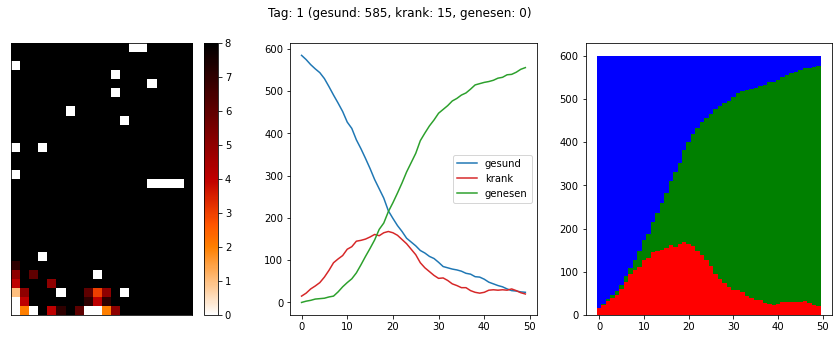

In [34]:
import numpy as np # NumPy: Bibliothek für numerische Berechnungen
import matplotlib.pyplot as plt # PyPlot: Bibliothek für Visualisierungen (Plots)
from IPython.display import display, clear_output # Jupyter-Notebook-spezifisch
import time # Jupyter-Notebook-spezifisch, könnte auch mit PyPlot gelöst werden

################################################################################
# Generation einer Zufallszahl mit einer Wahrscheinlichkeit von 25%            #
# Da Zufallszahlen uniform (gleichmässig) verteilt sind, können Sie hat jede   #
# generierte Zahl eine Wahrscheinlichkeit von 1/4 wenn Sie Zufallszahlen aus   #
# dem Bereich von vier Werten (1 aus {0,1,2,3}) generieren.                    #
################################################################################
def zufallszahl_25p():
    return np.random.randint(0, 4)


################################################################################
# Berechnung der nächsten Generation (Welt zum Zeitpunkt t+1),                 #
# ausgehend von der übergebenen Generation (Welt zum Zeitpunkt t)              #
# Argument:                                                                    #
# - world: Welt; ein zweidimensionaler Array (eine Matrix);                    #
#          stellt eine Generation (die Welt zu einem Zeitpunkt t) dar.         #
################################################################################
def iterate(world):

    # Kopie des Ausgangszustands machen
    old_world = np.copy(world)

    # Ansteckende Zellen markieren
    # Welt vereinfacht darstellen: alle ansteckenden Zellen sollen den Status 1
    # bekommen und alle andern Zellen den Status 0:
    # Zellen mit dem Status 8 sind genesen und nicht mehr ansteckend (-> Status 0)
    world_infectuous = np.where(world == 8, 0, world)
    # Zellen mit dem Status > 0 sind ansteckend (-> Status 1)
    # Der Status 1 muss nicht ersetzt werden, deshalb nur Werte > 1 suchen.
    # (Ihre Werte auf 1 zu setzen, ist im Moment noch nicht nötig...)
    world_infectuous = np.where(world_infectuous > 1, 1, 0)

    # Höhe und Breite der Welt bestimmen
    height = world.shape[0]
    width = world.shape[1]

    # Über alle Zellen iterieren
    for (i,j) in np.ndindex(world.shape):

        ########################################################################
        # Berechnung der Anzahl der infizierten Nachbarn (neighbours_infected) #
        ########################################################################

        # Anzahl ansteckender Nachbarzellen
        # Randzellen nicht anschauen
        neighbours_infectuous = 0
        if i > 0:
            neighbours_infectuous += world_infectuous[i-1, j]
        if i < height-1:
            neighbours_infectuous += world_infectuous[i+1, j]
        if j > 0:
            neighbours_infectuous += world_infectuous[i, j-1]
        if j < width-1:
            neighbours_infectuous += world_infectuous[i, j+1]

        # Oder wenn Sie davon ausgehen würden, dass die Ränder links und rechts
        # bzw. oben und unten benachbart sind:
        # neighbours_infectuous = 0
        # neighbours_infectuous += old_world[(i-1+height)%height, j]
        # neighbours_infectuous += old_world[i, (j-1+width)%width]
        # neighbours_infectuous += old_world[i, (j+1)%width]
        # neighbours_infectuous += old_world[(i+1)%height, j]

        ########################################################################
        # Berechnung des neuen Zustands der Zelle (state)                      #
        ########################################################################

        state = old_world[i,j]

        new_state = state

        # Anwendung der Regeln (Lösung der Aufgabe 9)
        if(state == 0 and neighbours_infectuous > 0 and zufallszahl_25p() == 0):
            new_state = 1
        elif state in range (1,8):
            new_state = state + 1

        world[i,j] = new_state


################################################################################
# Visualisierung                                                               #
# Argumente:                                                                   #
# - welt: zweidimensionaler Array (eine Matrix)                                #
#         stellt eine Generation (die Welt zu einem Zeitpunkt t) dar           #
# - number_of_iterations: Anzahl Generationen, die berechnet werden sollen     #
# - tick_length: Zeitabstände in denen die Generationen neu berechnet und      #
#                er zeugt werden. OPTIONAL: wenn tick_length beim Funktions-   #
#                aufruf nichts angegeben wird, wird der Standardwert (Default- #
#                wert) von 0.4 Sekunden verwendet.                             #
################################################################################
def display_world(world, number_of_iterations, tick_length=0.4):
    """Display the evolution of world for 
    the next number_of_iterations"""
    
    # Arrays vorbereiten (Lösung der Aufgabe 15, 1. Teil)
    gesund = np.zeros(number_of_iterations)
    krank = np.zeros(number_of_iterations)
    genesen = np.zeros(number_of_iterations)  
    
    # Vorbereitungen für die Anzeige der drei Plots
    # Für den Plot ein Figureobjekt definieren
    # (Sie können sich die Figure wie einen Platzhalter für den Plot vorstellen)
    figure = plt.figure(figsize=(15, 5))

    # 3 (Sub)plots nebeneinander in der figure definieren
    ax1 = figure.add_subplot(1, 3, 1)  # 1. Subplot (Welt) # 1 Zeile, 3 Spalten, der 1. Graph
    ax2 = figure.add_subplot(1, 3, 2)  # 1. Subplot (Welt) # 1 Zeile, 3 Spalten, der 2. Graph
    ax3 = figure.add_subplot(1, 3, 3)  # 1. Subplot (Welt) # 1 Zeile, 3 Spalten, der 3. Graph  
    
    for i in range(number_of_iterations):
        
        # Anzahl gesunder, kranker und genesener Zellen ermitteln
        gesund[i] = (world == 0).sum()
        krank[i] = (world < 8).sum() - (world == 0).sum()
        genesen[i] = (world == 8).sum()
        
        # Die 3 Sublots zeichnen #

        # 1. Subplot (Welt)
        # Welt darstellen
        # Zuerste den alten Subplot löschen
        ax1.clear()
        # keine Beschriftung der x- und y-Achsen
        ax1.set_xticks([]), ax1.set_yticks([])
        # Welt zeichnen
        img = ax1.imshow(world, cmap=plt.cm.gist_heat_r, vmin=0, vmax=8)
        # Farblegende zum Subplot definieren (als Teil der Figure nur einmal nötig)
        if i == 0:
            figure.colorbar(img, ax=ax1)            

        ## 2. Subplot (Linien)
        # Linien zeichnen
        # Zuerst das alte Diagramm leeren, anschliessend die Linien neu zeichnen
        ax2.clear()
        ax2.plot(gesund, 'tab:blue', label='gesund')
        ax2.plot(krank, 'tab:red', label='krank')
        ax2.plot(genesen, 'tab:green', label='genesen')
        # Legende anzeigen
        ax2.legend()

        ## 3. Subplot (Gestapelte Balken)
        # Balkenindex
        bar_index = np.arange(number_of_iterations)
        # Balkenbreite (1 bedeutet: bis zum näcnsten Balken)
        bar_width = 1
        # Balken zeichnen
        # der Parameter bottom steht für den Wert am unteren Rand des Balkens
        # Zuerst das alte Diagramm leeren, anschliessend die Balken neu zeichnen
        ax3.clear()
        ax3.bar(bar_index, krank, bar_width, label='krank', color='red')
        ax3.bar(bar_index, genesen, bar_width, label='genesen', bottom=krank, color='green')
        ax3.bar(bar_index, gesund, bar_width, label='gesund', bottom=krank+genesen, color='blue')

        # Titel der Figure definieren (den 3 Subplots übergeordnet)
        if i == 0:
            figure.suptitle("Tag: " + str(i+1)
                            + " (gesund: " + str((world == 0).sum())
                            + ", krank: " + str((world < 8).sum()-(world == 0).sum())
                            + ", genesen: " + str((world == 8).sum()) + ")")

        # -----------------------------------

        # Die nächste Generation berechnen (Aufruf der oben definierten Funktion)
        iterate(world)

        # Anzeige des Plots (ausserhalb von Jupyter; wäre hier aber auch "erlaubt")
        display(figure)
        
        # Den Output der aktuellen Zelle (des Jupyter Notebooks) löschen
        # parameter wait: Soll gewartet werden, bis der neue Output bereitsteht?
        clear_output(wait=True)

        # Warten (tick_length Sekunden)
        time.sleep(tick_length)
        

################################################################################
# Erstellung einer neuen Welt                                                  #
#                                                                              #
# Gibt eine Welt (zweidimensionaler Array aus Integern) mit der Dimension      #
# hoehe Mal breite zurück, in der anzahl_infizierte einen Wert von 1 bis 7     #
# haben, und die restlichen Zellen haben den Wert 0.                           #
#                                                                              #
# Argumente:                                                                   #
# - hoehe und breite: Dimension der Welt                                       #
# - anzahl_infizierte: Anzahl Kranze am Anfang der Simulation                  #
################################################################################
def neue_welt(hoehe, breite, anzahl_infizierte):
    welt = np.zeros((hoehe, breite), int)

    while anzahl_infizierte > 0:
        rand_x = np.random.randint(0, breite)
        rand_y = np.random.randint(0, hoehe)
        if welt[rand_y, rand_x] == 0:
            welt[rand_y, rand_x] = np.random.randint(1,8)
            anzahl_infizierte -= 1 # anzahl_infizierte um 1 verkleinern

    return welt


################################################################################
# Definition der Funktion simuliere_ausbreitung                                #
# erstellt eine Population einer gegebenen Dimension                           #
# mit einer gegebenen Anzahl Infizierter (Ansteckender)                        #
# und visualisiert die Simulation über eine gegebene Anzahl Tage               #
#                                                                              #
# Argumente (Parameter der Simulation):                                        #
# - hoehe und breite: Dimension der Welt                                       #
# - anzahl_infizierte: Anzahl Kranze am Anfang der Simulation                  #
# - anzahl_tage: Anzahl Generationen, die berechnet werden sollen              #
# - (ticklaenge): Anzeigegeschwindigkeit; Zeitabstände in denen die Generati-  #
#                 onen neu berechnet und erzeugt werden (analog tick_length    #
#                 aus dem Game of Life).                                       #
#                 OPTIONAL: wenn beim Funktionsaufruf keine Ticklänge angege-  #
#                 ben wird, wird der Standardwert (Defaultwert) von 0.2 Sekun- #
#                 den verwendet.                                               #
################################################################################
def simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage, ticklaenge=0.2):
    welt = neue_welt(hoehe, breite, anzahl_infizierte)
    display_world(welt, anzahl_tage, tick_length=ticklaenge)


################################################################################
# ############################################################################ #
# #                                                                          # #
# # SIMULATION DER AUSBREITUNG EINES KRANKHEITSERREGERS                      # #
# #                                                                          # #
# #                                                                          # #
# # Parameter der Simulation:                                                # #
# #                                                                          # #
# # - hoehe und breite: Dimension der Welt                                   # #
# # - anzahl_infizierte: Anzahl Kranze am Anfang der Simulation              # #
# # - anzahl_tage: Anzahl Generationen, die berechnet werden sollen          # #
# # - (ticklaenge): Anzeigegeschwindigkeit (optional)                        # #
# #                 Zeitabstände in denen die Generationen neu berechnet und # #
# #                 erzeugt werden (analog tick_lengthaus dem Game of Life). # #
# #                                                                          # #
# #                 OPTIONAL: wenn beim Funktionsaufruf keine Ticklänge      # #
# #                 angegeben wird, wird der Standardwert (Defaultwert) von  # #
# #                 0.2 Sekunden verwendet.                                  # #
# #                                                                          # #
# #                                                                          # #
# # Simulation starten:                                                      # #
# #                                                                          # #
# # simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage)     # #
# #                                                                          # #
# ############################################################################ #
################################################################################
hoehe = 30
breite = 20
anzahl_infizierte = 15
anzahl_tage = 50
ticklaenge = 0.1 # optional, Sie können die Funktion auch ohne
                 # ticklaenge definieren, dann wird display_world
                 # mit dem Standardwert 0.2 Sekunden aufgerufen.

# Simulation starten
simuliere_ausbreitung(hoehe, breite, anzahl_infizierte, anzahl_tage)




Dieses Modell ist stark vereinfacht. Im richtigen Leben gibt es zahlreiche Validierungs- und Überarbeitungsphasen. Die Modelle werden auf der Basis der erhobenen Daten laufend angepasst und verbessert.

Hier könnten Sie mit der Ansteckungswahrscheinlichkeit experimentieren oder Sie könnten neue Stati definieren.


## 5. Weitere Simulationen

Schauen Sie sich ein(ig)e der folgenden Simulationen an. 

Unter Model Info -> HOW TO USE IT finden Sie Informationen zu den wichtigsten Parametern der Modelle und teilweise auch Fragestellungen. Versuchen Sie herauszufinden, was die einzelnen Parameter oder deren Kombination bewirken.

* [Klimawandel](http://netlogoweb.org/launch#http://netlogoweb.org/assets/modelslib/Sample%20Models/Earth%20Science/Climate%20Change.nlogo)
* [Ansteckungen](http://www.netlogoweb.org/launch#http://www.netlogoweb.org/assets/modelslib/Sample%20Models/Biology/Disease%20Solo.nlogo)
* [Wölfe und Schafe](http://www.netlogoweb.org/launch#http://www.netlogoweb.org/assets/modelslib/Sample%20Models/Biology/Wolf%20Sheep%20Predation.nlogo)
* [Ameisenstrasse](http://www.netlogoweb.org/launch#http://www.netlogoweb.org/assets/modelslib/Sample%20Models/Biology/Ant%20Lines.nlogo)
* [Herbst](http://www.netlogoweb.org/launch#http://www.netlogoweb.org/assets/modelslib/Sample%20Models/Biology/Autumn.nlogo)
* [Vogelschwarm](http://www.netlogoweb.org/launch#http://www.netlogoweb.org/assets/modelslib/Sample%20Models/Biology/Flocking.nlogo)
* [Wölfe und Schafe](http://www.netlogoweb.org/launch#http://www.netlogoweb.org/assets/modelslib/Sample%20Models/Biology/Evolution/Wolf%20Sheep%20Stride%20Inheritance.nlogo)
* [Sand](http://www.netlogoweb.org/launch#http://www.netlogoweb.org/assets/modelslib/Sample%20Models/Chemistry%20&%20Physics/Sand.nlogo)
* [Mergesort](http://www.netlogoweb.org/launch#http://www.netlogoweb.org/assets/modelslib/Sample%20Models/Computer%20Science/Unverified/Merge%20Sort.nlogo)
* [Sortieralgorithmen Übersicht](https://www.toptal.com/developers/sorting-algorithms)


## 6. Abschluss Simulationen

Erinnern Sie sich an die Grafik aus der ersten Lektion. 

Eine Simulation besteht aus einem *Modell*, verschiedenen *Parametern* und einer optionalen *Visualisierung*. Das *Simulieren* geschieht in drei Phasen, dem *Modellieren* (und *Validieren*), dem *Visualisieren* und dem *Interpretieren*. 

<img src="images/simulation_teile.png" alt="simulation_teile" width="25%"/>

Ausgehend von einer Fragestellung wird die Welt im **Modell** vereinfacht abgebildet. Verschiedene Parameter haben Einfluss auf das System. Durch Verändern der **Parameter** ändert sich das Verhalten des Systems, woraus **Erkenntnisse** gewonnen werden können. 

Das **Modell** ist bei einer Simulation die grösste Herausforderung. Es muss überprüft und gegebenenfalls angepasst werden, um genauer zu werden (**Validierung**). Dazu ist es nötig, dass genügend Daten zur Verfügung stehen. *Der schwierigste Teil einer Simulation besteht in der Definition eines passenden, aussagekräftigen und gültigen Modells.*

Mittels **Visualisierungen** werden die Sachverhalte sichtbar gemacht. Visualisierungen sind für eine Simulation zwar nicht unbedingt nötig, sind aber häufig hilfreich.

### 6.2. Erkenntnisse

Neben den Simulationen haben Sie auch fortgeschrittene Einblicke ins Programmieren bekommen.

Sie haben

* mit der Bibliothek NumPy *zweidimensionale Arrays* erstellt, initialisiert und manipuliert, um fürs Game of Life Anfangsgenerationen zu definieren,
* mit der Bibliothek Matplotlib zweidimensionale Arrays *visualisiert*,
* mit *fremdem Code* gearbeitet und um ihn zu verstehen die Dokumentation verwendet, Funktionsaufrufe auskommentiert oder deren Parameter geändert und beobachtet, was passiert,
* *Tupel* angetroffen, die Sie bisher eher selten verwendet haben (Beispiel: Koordinatenpaare (x,y))
* und sind mit dem *Slicing* mit Hilfe des *Teilbereichsoperators* vertrauter geworden.


#### Quellen

* Basis Code Game of Life: [julienmesselier auf GitHub](https://github.com/julienmesselier/game-of-life)
* Idee mit Ansteckungswahrscheinlichkeit: Lukas Fässler, David Sichau, 2020: [E.Tutorial: Programmieren mit Python, Modul 4](https://et.lecturers.inf.ethz.ch/viewer/module/Hi9Cyq9RkwLMmSPKT?course_id=b6wSvFsS8ydmuZ7R2&module_locale_key=de), ETH Zürich
* Daniel Shiffman: [The Nature of Code](https://natureofcode.com/book/chapter-7-cellular-automata/), [YouTube-Kanal: The Coding Train](https://www.youtube.com/channel/UCvjgXvBlbQiydffZU7m1_aw)
* Dokumentationen von [NumPy](https://numpy.org/doc/1.21/reference/index.html) und [Matplotlib](https://matplotlib.org/stable/contents.html)
* zusätzliche Simulationen: Wilensky, U. (1999). NetLogo. [http://ccl.northwestern.edu/netlogo/](http://ccl.northwestern.edu/netlogo/). Center for Connected Learning and Computer-Based Modeling, Northwestern University, Evanston, IL.)

Alessandra Donzé, September 2021